## Importing and checking libraries

In [1]:
#importing the libraries required for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
loan_dat=pd.read_csv('loan.csv') 

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
loan_dat.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [6]:
#checking dataset attributes
print(loan_dat.shape)

(39717, 111)


In [7]:
#checking dataset attributes
print(loan_dat.info())
print(loan_dat.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


## Data Formatting

In [8]:
#checking null rows..
print('null rows=')
loan_dat.isnull().all(axis=1).sum()

null rows=


0

In [9]:
#checking null columns..
print('null columns=')
loan_dat.isnull().all(axis=0).sum()

null columns=


54

In [10]:
#Checking the summary of dataset columns for null value
loan_dat.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
#Since there are 54 columns with null values; these need to be dropped for clear analysis
#dropping all the empty columns
loan_dat=loan_dat.dropna(how='all',axis=1)

In [12]:
loan_dat.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [13]:
#dropping next_pymnt_d since it has a lot of missing values
loan_dat=loan_dat.drop('next_pymnt_d',axis=1)

In [14]:
#Dropping other non-required columns since they just add details that doesn't participate in our analysis
drop_cols1=['url','pymnt_plan','desc','zip_code']
loan_dat=loan_dat.drop(drop_cols1,axis=1)

In [15]:
loan_dat.shape

(39717, 52)

In [16]:
#Checking for duplicate rows now through values in id column
dup=loan_dat[loan_dat.duplicated(['id'])]
dup

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

In [17]:
#changing the date-time value into seperate columns
loan_dat['issue_year']=pd.to_datetime(loan_dat.issue_d,format='%b-%y').dt.year
loan_dat['issue_month']=pd.to_datetime(loan_dat.issue_d,format='%b-%y').dt.month
loan_dat['earliest_credit_line_year']=pd.to_datetime(loan_dat.earliest_cr_line,format='%b-%y').dt.year

In [18]:
loan_dat.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose                 title addr_state    dti  delinq_2yrs  \
0     credit_card              Computer         AZ  27.65            0   
1             car                  bike         GA   1.00            0   
2  small_business  real estate business         IL   8.72            0   
3           other              personel         CA  20.00            0   
4           other              Personal         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
3        0.00                     0.00       Jan-15           357.48   
4        0.00                     0.00       May-16            67.79   

  last_credit_pull_d  collections_12_mths_ex_

In [19]:
#looking at the data, intreset column is useful for the analysis.So, remove '%' symbol from the end of it to perform numerical operations and also converting it to float dtype.
loan_dat['int_rate']=loan_dat.int_rate.str.strip('%')
loan_dat['int_rate']=loan_dat['int_rate'].apply(lambda x:float(x))

loan_dat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [20]:
#Formatting months column
loan_dat['term']=loan_dat.term.str.rstrip('months')
loan_dat['term']=loan_dat['term'].apply(lambda x:int(x))
loan_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int64  
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

<AxesSubplot:xlabel='loan_amnt'>

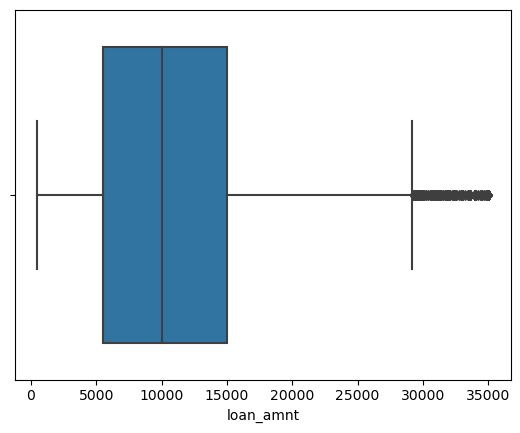

In [21]:
sns.boxplot(loan_dat['loan_amnt'])

In [22]:
# We can see the outliers beyond 30K
#so printing quantile values
loan_dat.loan_amnt.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,1])

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
10%       3200.000000
20%       5000.000000
30%       6000.000000
40%       8000.000000
50%      10000.000000
60%      12000.000000
70%      14000.000000
80%      16750.000000
90%      22000.000000
95%      25000.000000
97%      30000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

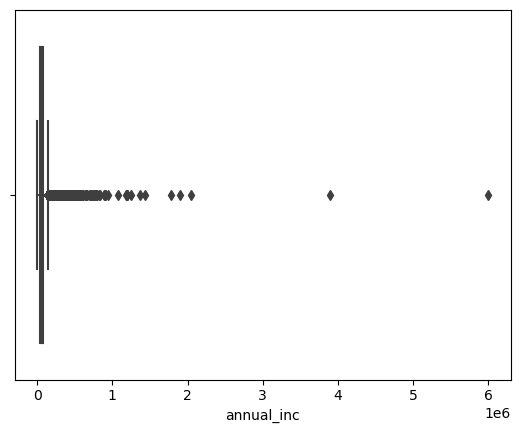

In [23]:
sns.boxplot(loan_dat['annual_inc'])

In [24]:
# We can see a lot of the outliers beyond 6000000
#so printing quantile values
loan_dat.annual_inc.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,1])

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
10%      3.000000e+04
20%      3.750000e+04
30%      4.500000e+04
40%      5.040000e+04
50%      5.900000e+04
60%      6.584440e+04
70%      7.560000e+04
80%      9.000000e+04
90%      1.160000e+05
95%      1.420000e+05
97%      1.657579e+05
100%     6.000000e+06
max      6.000000e+06
Name: annual_inc, dtype: float64

In [25]:
#Lets clear these outlier values.
loan_outlier=loan_dat[loan_dat['loan_amnt']>=35000]
loan_outlier.loan_status.value_counts()

Fully Paid     451
Charged Off    150
Current         78
Name: loan_status, dtype: int64

In [26]:
#Since there is no special trend of charge off in higher amount loan, we can discard the data corresponding from the data set.
loan=loan_dat[loan_dat['loan_amnt']<=30000]

In [27]:
#Check for outlier on annual income.
loan_outlier=loan[loan['annual_inc']>=200000]
loan_outlier.loan_status.value_counts()


Fully Paid     540
Charged Off     61
Current         13
Name: loan_status, dtype: int64

In [28]:
loan=loan[loan['annual_inc']<=200000]
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38391 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38391 non-null  int64  
 1   member_id                   38391 non-null  int64  
 2   loan_amnt                   38391 non-null  int64  
 3   funded_amnt                 38391 non-null  int64  
 4   funded_amnt_inv             38391 non-null  float64
 5   term                        38391 non-null  int64  
 6   int_rate                    38391 non-null  float64
 7   installment                 38391 non-null  float64
 8   grade                       38391 non-null  object 
 9   sub_grade                   38391 non-null  object 
 10  emp_title                   36052 non-null  object 
 11  emp_length                  37339 non-null  object 
 12  home_ownership              38391 non-null  object 
 13  annual_inc                  383

In [29]:
#Checking the loan_status unique values
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [30]:
#percentages of loan_statuses
print((loan.loan_status.value_counts()*100)/len(loan))

Fully Paid     83.243469
Charged Off    14.055378
Current         2.701154
Name: loan_status, dtype: float64


Subsetting based on loan_status since it might be useful in future Analysis

In [31]:
#Subsetting the Charged off customers
loan1=loan[loan['loan_status']=='Charged Off']

In [32]:
#creating dataset excluding current and chargedoff customers
loan2=loan[loan['loan_status']=='Fully Paid']

In [33]:
#creating another dataset to check the behaviour of people that paid loans properly
loan3=loan[loan.id.isin(loan1.id)==False]

In [34]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1 to 39688
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5396 non-null   int64  
 1   member_id                   5396 non-null   int64  
 2   loan_amnt                   5396 non-null   int64  
 3   funded_amnt                 5396 non-null   int64  
 4   funded_amnt_inv             5396 non-null   float64
 5   term                        5396 non-null   int64  
 6   int_rate                    5396 non-null   float64
 7   installment                 5396 non-null   float64
 8   grade                       5396 non-null   object 
 9   sub_grade                   5396 non-null   object 
 10  emp_title                   4938 non-null   object 
 11  emp_length                  5175 non-null   object 
 12  home_ownership              5396 non-null   object 
 13  annual_inc                  5396

In [35]:
#checking for more rows to delete
loan1.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                      458
emp_length                     221
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
title                            2
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
mths_since_last_delinq        3325
mths_since_last_record        4836
open_acc                         0
pub_rec                          0
revol_bal           

In [36]:
loan1.describe()

id     member_id     loan_amnt   funded_amnt  \
count  5.396000e+03  5.396000e+03   5396.000000   5396.000000   
mean   6.927737e+05  8.615460e+05  11304.192921  11003.298740   
std    2.160404e+05  2.724023e+05   7059.399436   6790.655651   
min    6.141900e+04  8.035300e+04    900.000000    900.000000   
25%    5.267632e+05  6.807235e+05   5443.750000   5200.000000   
50%    6.836490e+05  8.722610e+05  10000.000000  10000.000000   
75%    8.484318e+05  1.059917e+06  15856.250000  15000.000000   
max    1.077430e+06  1.314167e+06  30000.000000  30000.000000   

       funded_amnt_inv         term     int_rate  installment     annual_inc  \
count      5396.000000  5396.000000  5396.000000  5396.000000    5396.000000   
mean      10152.517794    45.869533    13.688252   317.009442   58202.822324   
std        6702.639900    11.810460     3.594989   194.496890   31015.551563   
min           0.000000    36.000000     5.420000    22.790000    4080.000000   
25%        4974.473196    36.000000    11.140000   166.500000   36129.000000   
50%        8951.780000    36.000000    13.490000   282.995000   51650.180000   
75%       14769.777487    60.000000    16.290000   426.600000   72000.000000   
max       30000.000000    60.000000    24.400000  1090.460000  200000.000000   

               dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  5396.000000  5396.000000     5396.000000             2071.000000   
mean     14.030928     0.170497        1.051890               36.282955   
std       6.584014     0.537240        1.146172               22.636406   
min       0.000000     0.000000        0.000000                0.000000   
25%       9.097500     0.000000        0.000000               18.000000   
50%      14.330000     0.000000        1.000000               35.000000   
75%      19.332500     0.000000        2.000000               53.000000   
max      29.850000     8.000000        8.000000              107.000000   

       mths_since_last_record     open_acc      pub_rec      revol_bal  \
count              560.000000  5396.000000  5396.000000    5396.000000   
mean                74.683929     9.112305     0.085619   13000.376946   
std                 41.380625     4.514747     0.286374   14640.246063   
min                  0.000000     2.000000     0.000000       0.000000   
25%                 52.250000     6.000000     0.000000    3902.000000   
50%                 92.000000     8.000000     0.000000    8896.500000   
75%                105.000000    12.000000     0.000000   16809.250000   
max                129.000000    38.000000     2.000000  147365.000000   

         total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
count  5396.000000     5396.0         5396.0   5396.000000      5396.000000   
mean     21.153632        0.0            0.0   6370.085921      5917.761896   
std      11.360514        0.0            0.0   5834.754426      5700.590509   
min       2.000000        0.0            0.0      0.000000         0.000000   
25%      12.000000        0.0            0.0   2136.632500      1813.495000   
50%      19.000000        0.0            0.0   4648.000000      4153.330000   
75%      28.000000        0.0            0.0   8702.665000      8097.340000   
max      74.000000        0.0            0.0  37610.610000     37610.610000   

       total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  \
count      5396.000000    5396.000000         5396.000000   5396.000000   
mean       3766.812813    1989.583403            4.094676    609.594989   
std        3629.419340    2172.282696           12.033579   1528.936208   
min           0.000000       0.000000            0.000000      0.000000   
25%        1178.292500     538.955000            0.000000      0.000000   
50%        2642.895000    1220.855000            0.000000    169.360000   
75%        5120.935000    2616.247500            0.000000    551.535000   
max       24401.870000   16032.820000          166.4297

In [37]:
loan2.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.195800e+04  3.195800e+04  31958.000000  31958.000000   
mean   6.699123e+05  8.344958e+05  10378.381782  10159.975593   
std    2.076462e+05  2.628491e+05   6495.011846   6298.053976   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.067005e+05  6.524230e+05   5000.000000   5000.000000   
50%    6.464970e+05  8.269085e+05   9000.000000   9000.000000   
75%    8.198108e+05  1.027489e+06  14400.000000  14000.000000   
max    1.077501e+06  1.313524e+06  30000.000000  30000.000000   

       funded_amnt_inv          term      int_rate   installment  \
count     31958.000000  31958.000000  31958.000000  31958.000000   
mean       9670.498122     40.957256     11.531632    307.590292   
std        6256.362501      9.716106      3.555316    190.239514   
min           0.000000     36.000000      5.420000     15.690000   
25%        5000.000000     36.000000      8.490000    163.110000   
50%        8300.000000     36.000000     11.480000    269.250000   
75%       13150.000000     36.000000     13.980000    405.075000   
max       30000.000000     60.000000     24.110000   1106.070000   

          annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count   31958.000000  31958.000000  31958.000000    31958.000000   
mean    64810.292439     13.216849      0.141936        0.834814   
std     33390.514594      6.668076      0.484454        1.046424   
min      4000.000000      0.000000      0.000000        0.000000   
25%     40363.670000      8.060000      0.000000        0.000000   
50%     58000.000000     13.280000      0.000000        1.000000   
75%     80004.000000     18.460000      0.000000        1.000000   
max    200000.000000     29.990000     11.000000        8.000000   

       mths_since_last_delinq  mths_since_last_record      open_acc  \
count            11193.000000             2134.000000  31958.000000   
mean                35.885821               67.927835      9.235559   
std                 21.914252               44.550508      4.362572   
min                  0.000000                0.000000      2.000000   
25%                 18.000000                0.000000      6.000000   
50%                 34.000000               89.000000      9.000000   
75%                 52.000000              104.000000     12.000000   
max                120.000000              120.000000     44.000000   

            pub_rec     revol_bal     total_acc  out_prncp  out_prncp_inv  \
count  31958.000000   31958.00000  31958.000000    31958.0        31958.0   
mean       0.051380   12689.38391     21.923462        0.0            0.0   
std        0.230483   14941.59244     11.325472        0.0            0.0   
min        0.000000       0.00000      2.000000        0.0            0.0   
25%        0.000000    3527.25000     13.000000        0.0            0.0   
50%        0.000000    8499.50000     20.000000        0.0            0.0   
75%        0.000000   16298.75000     29.000000        0.0            0.0   
max        4.000000  149588.00000     90.000000        0.0            0.0   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  31958.000000     31958.000000     31958.000000   31958.000000   
mean   12134.120455     11540.869326     10159.971001    1973.288908   
std     7946.866469      7879.325922      6298.052677    2085.523311   
min      526.332241         0.000000       500.000000       6.220000   
25%     6052.361715      5652.957500      5000.000000     645.107500   
50%    10404.553185      9751.750000      9000.000000    1264.450000   
75%    16457.549115     15692.432500     14000.000000    2525.192500   
max    48352.229930     48155.650000     30000.010000   18352.230000   

       total_rec_late_fee  recoveries  collection_recovery_fee  \
count        31958.000000     31958.0                  31958.0   
mean             0.860646         0.0                      0.0   
std              5.66346

# Univariate analysis

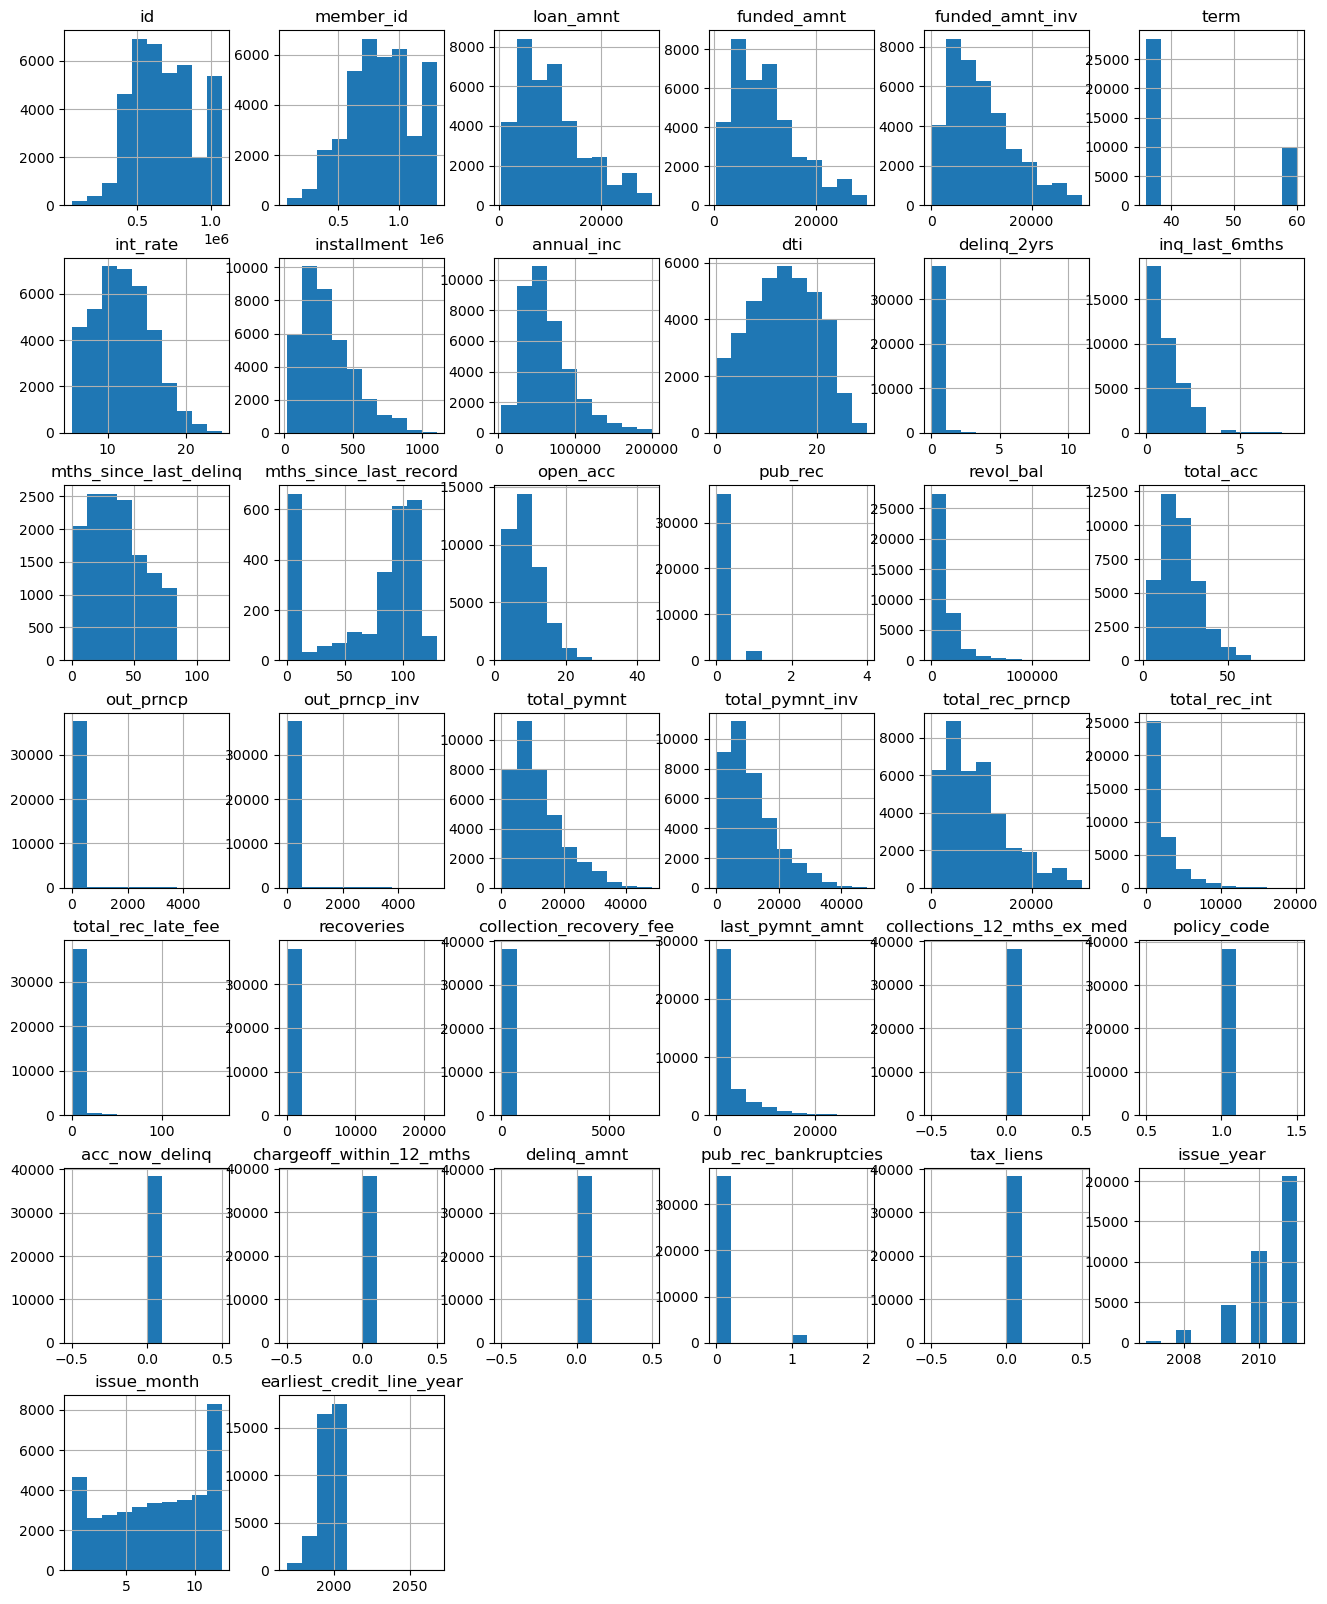

In [38]:
#Checking histogram for all attributes for every loan borrower
hist=loan.hist(bins=10,figsize=(16,20))

## From the above histogramns, we can draw few observations:
#a)Most loans have been issued in December and january.b)Issuing of loans is increasing per year.c)most loans are for the duration of 36 months.
#Need to have closer inspection at 'loan_amt','int_rate','total_acc','revol_bal','pub_rec_bankruptacies'&Other object type sets like 'home_ownership','grade','Sub-grade'

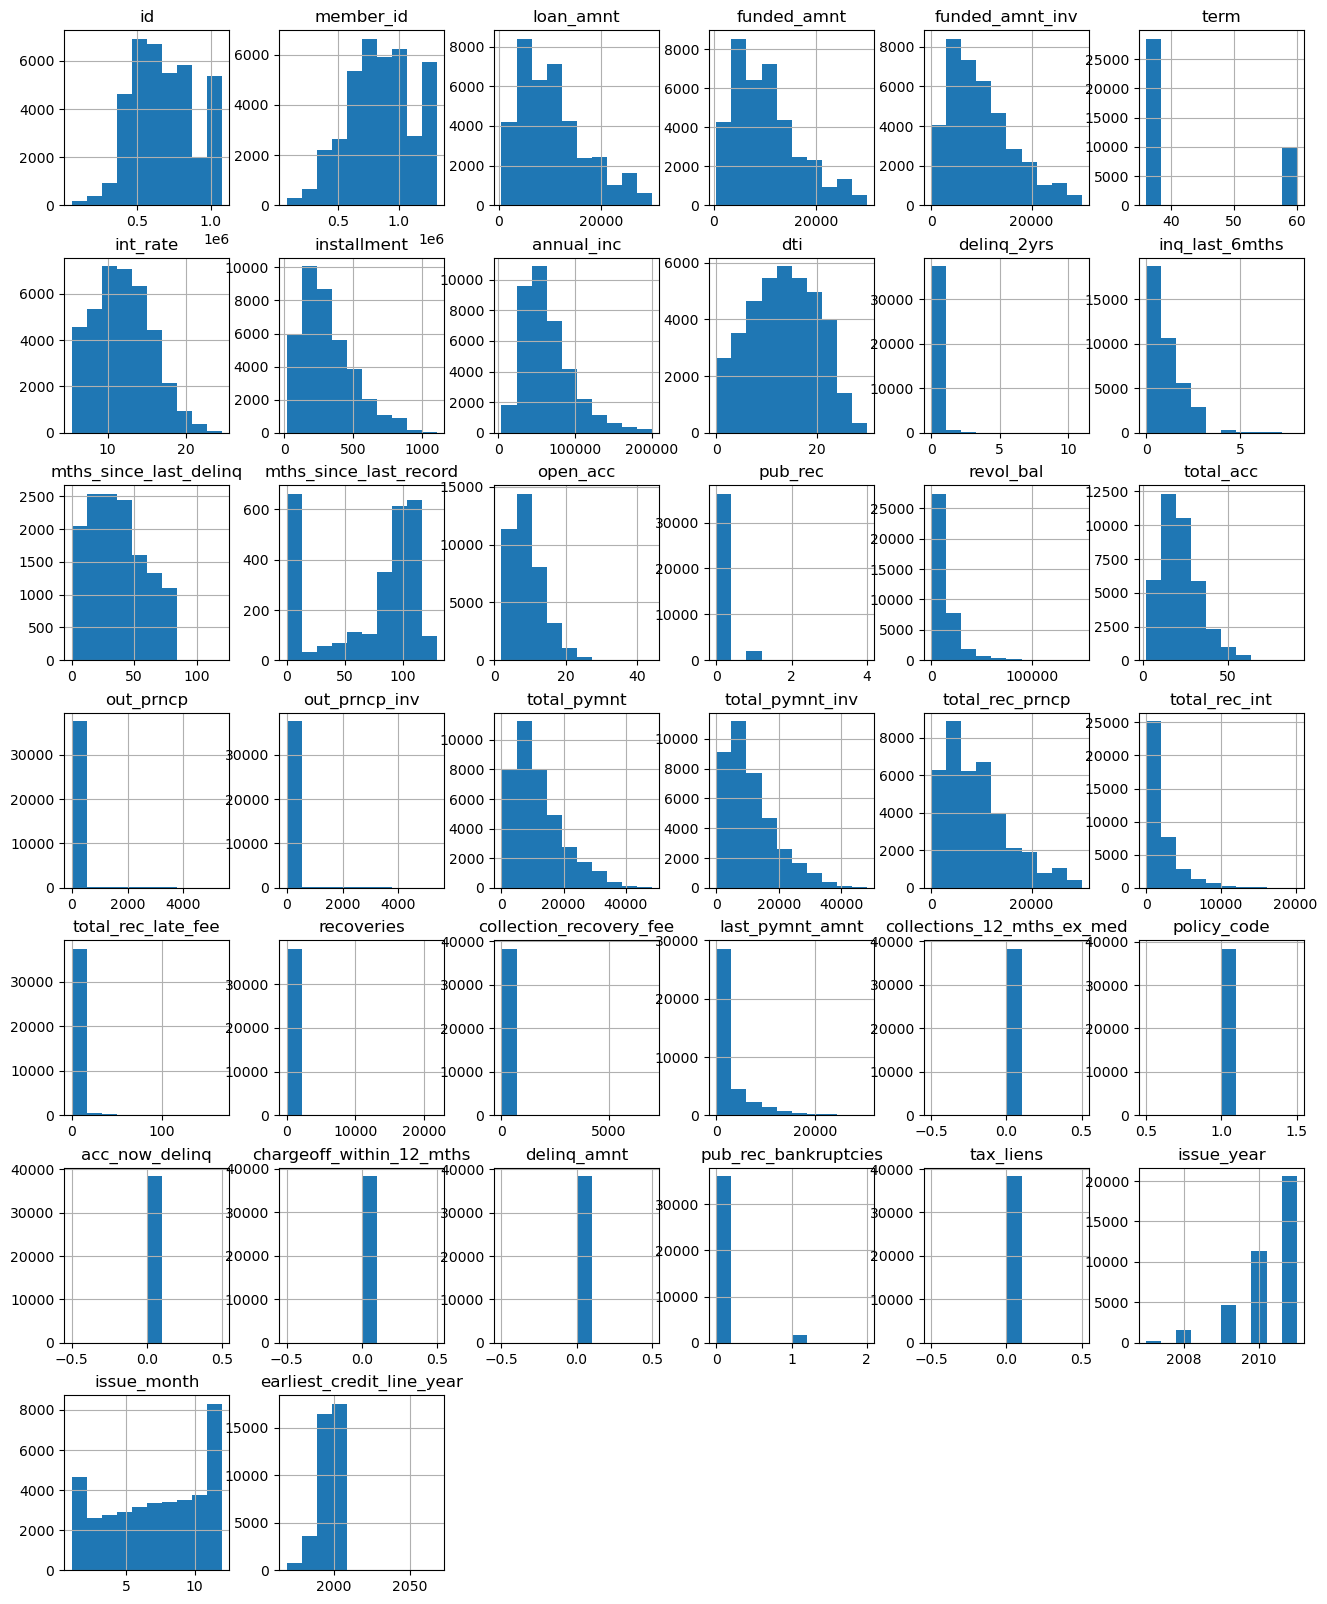

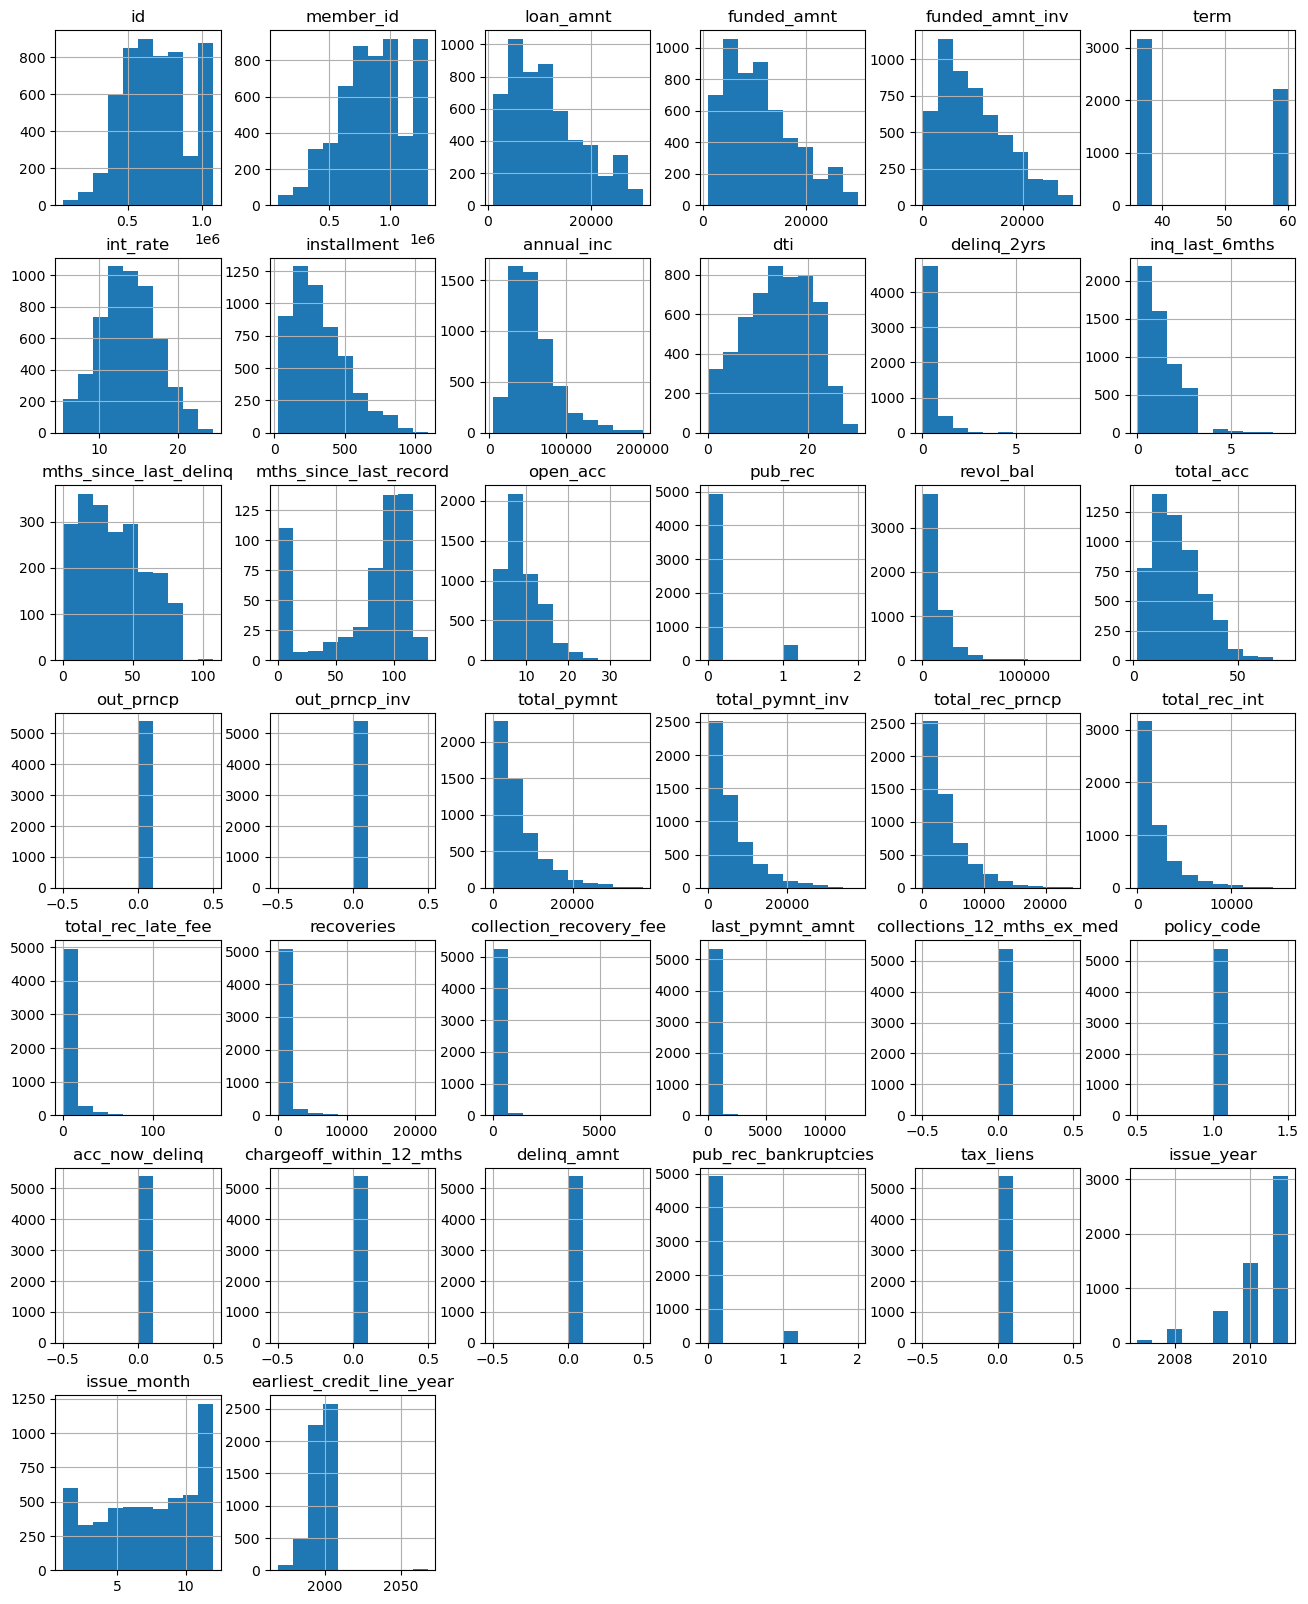

In [39]:
#Checking histogram for all attributes for only charged off customers
hist=loan.hist(bins=10,figsize=(16,20))
hist=loan1.hist(bins=10,figsize=(16,20))

#From above histograms the trend of charged off customers is observed and compared with fully piad customers but the trend across the board is almost similar.So, need to do closer analysis.

In [40]:
#classifying variable for future use.
borrower_attr=['emp_length','emp_title','home_ownership','annual_inc','addr_state','dti','open_acc','revol_bal','total_acc','application_type','pub_rec_bankruptcies']
loan_attr=['loan_amnt','int_rate','installment','grade','sub_grade','purpose','total_rec_late_fee','recoveries']
misc_attr=['issue_month','issue_year','last_credit_pull_d']

id


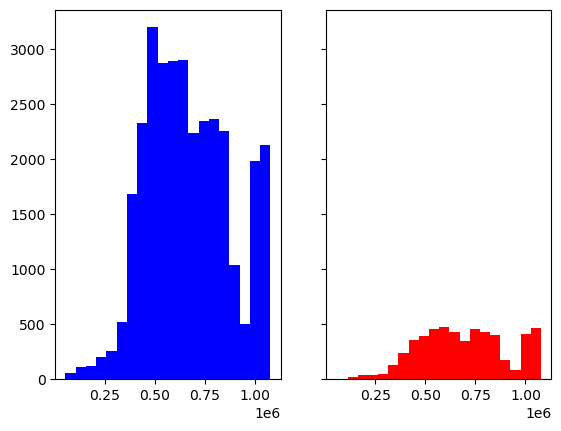

member_id


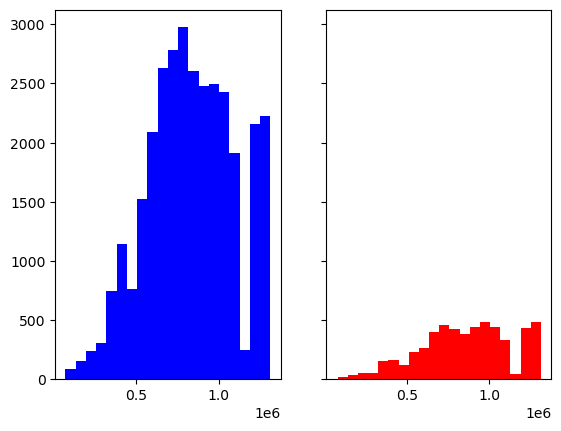

loan_amnt


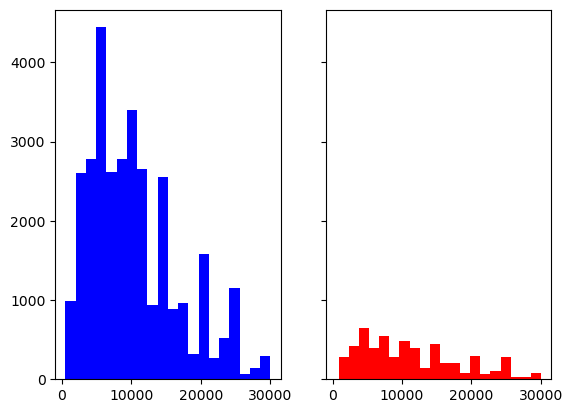

funded_amnt


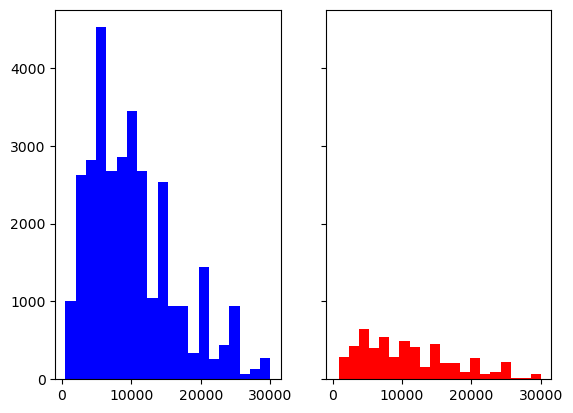

funded_amnt_inv


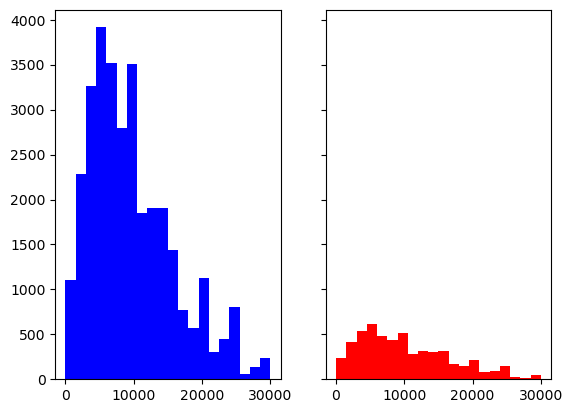

term


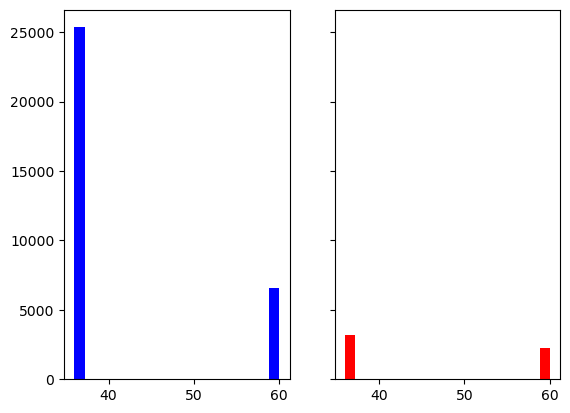

int_rate


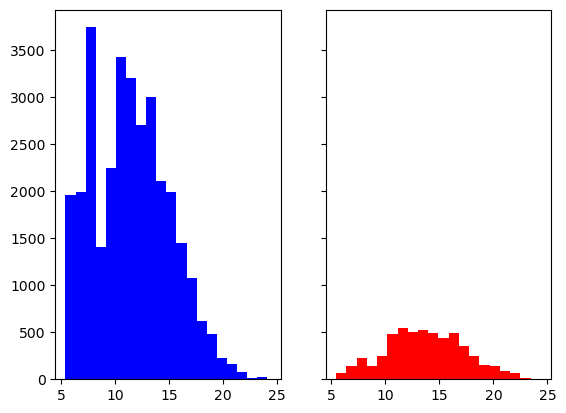

installment


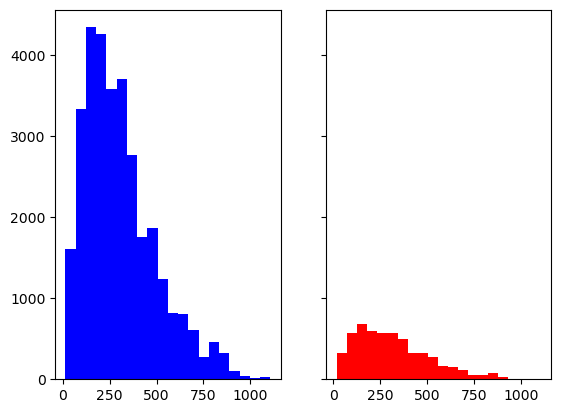

annual_inc


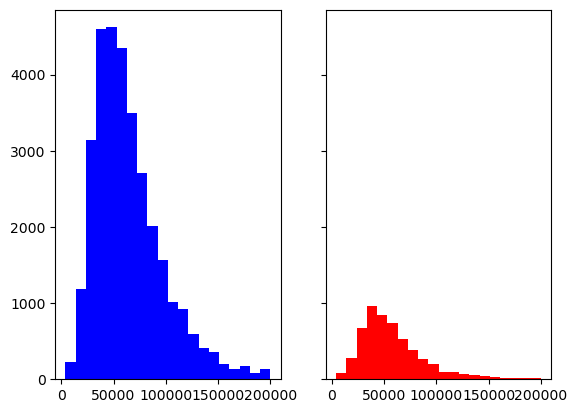

dti


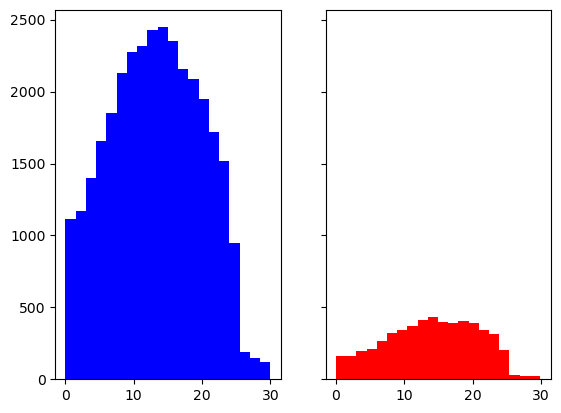

delinq_2yrs


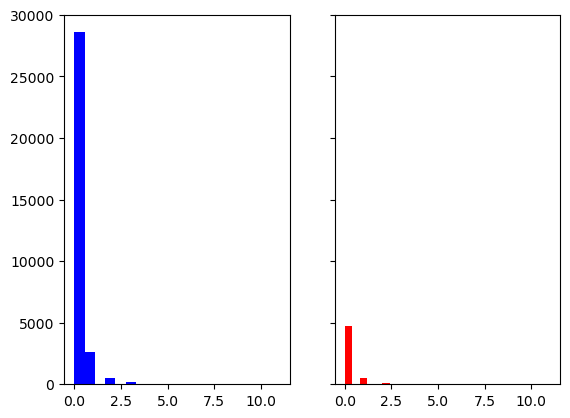

inq_last_6mths


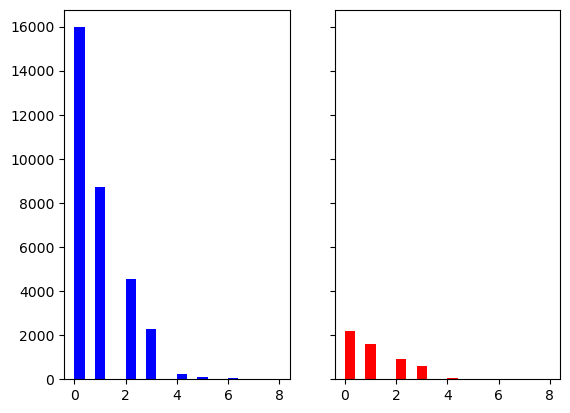

mths_since_last_delinq


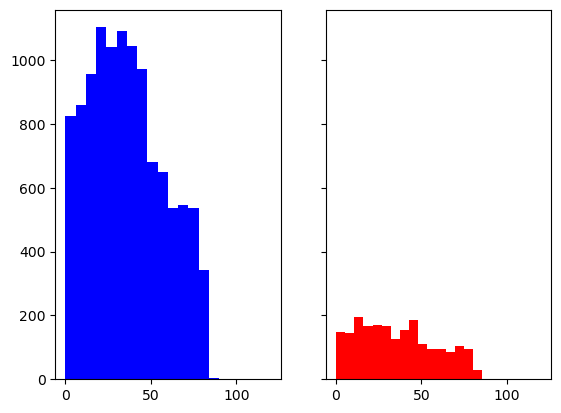

mths_since_last_record


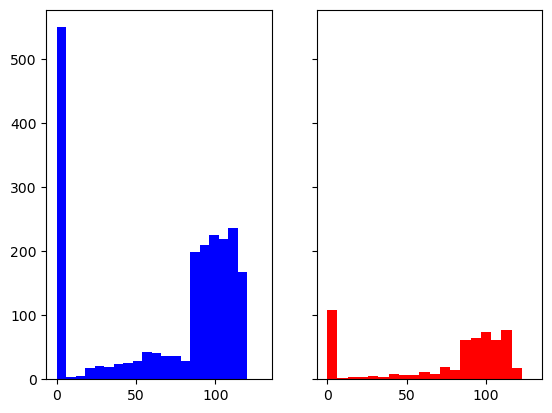

open_acc


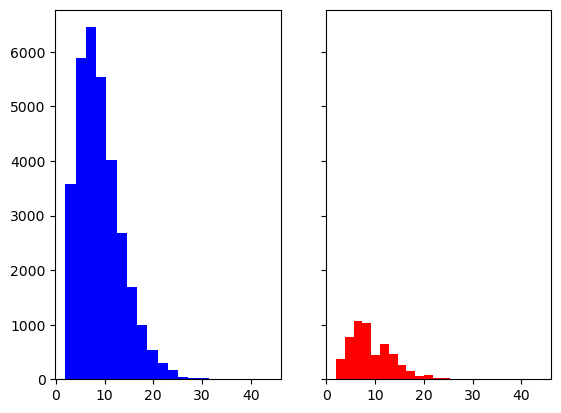

pub_rec


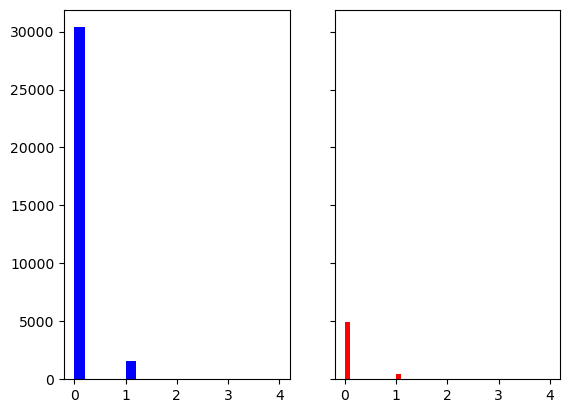

revol_bal


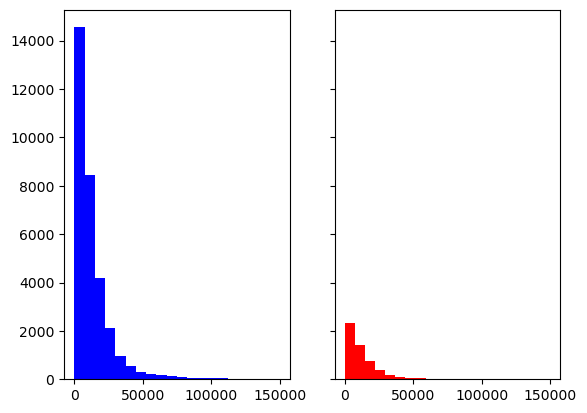

total_acc


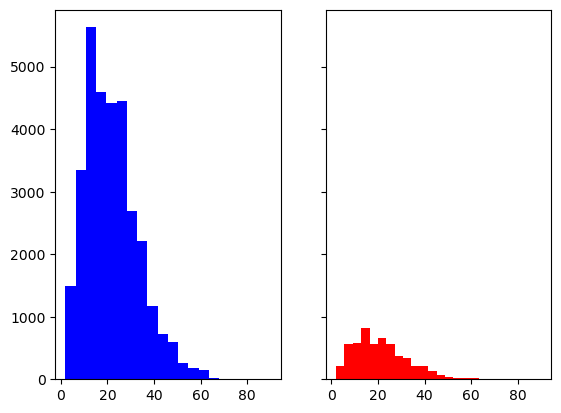

out_prncp


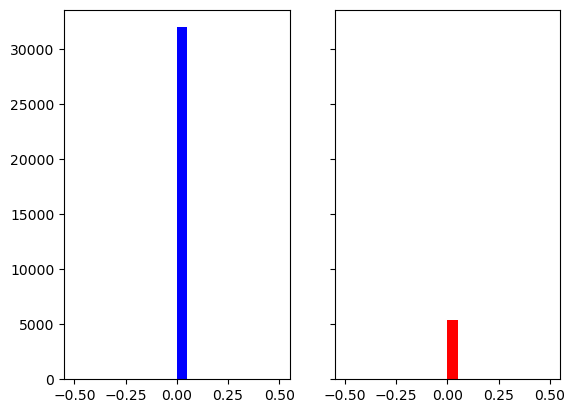

out_prncp_inv


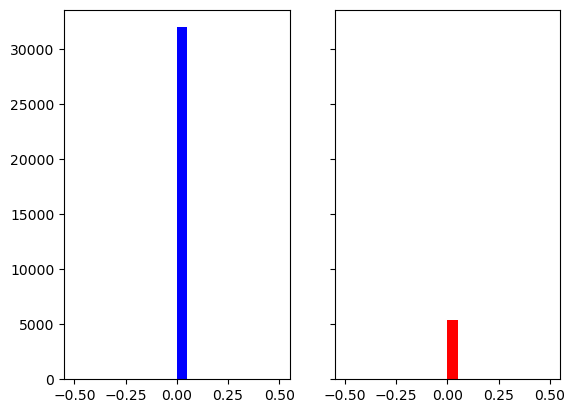

total_pymnt


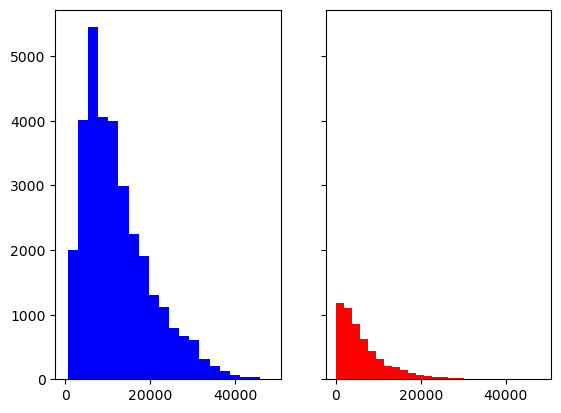

total_pymnt_inv


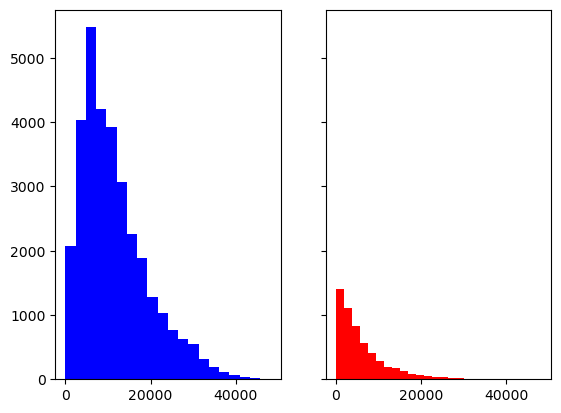

total_rec_prncp


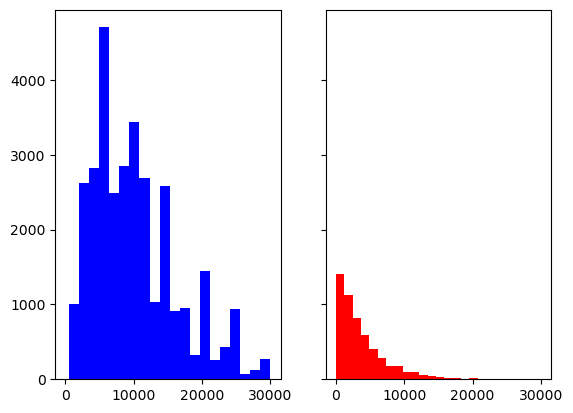

total_rec_int


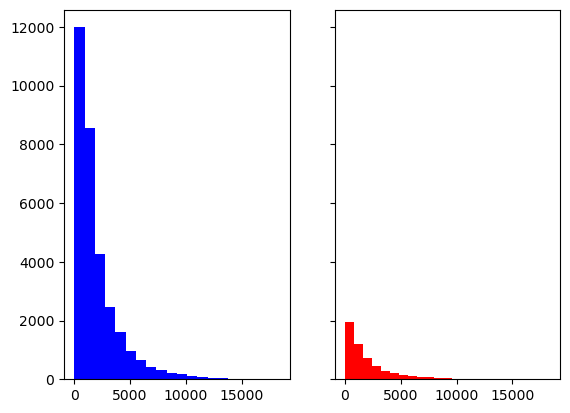

total_rec_late_fee


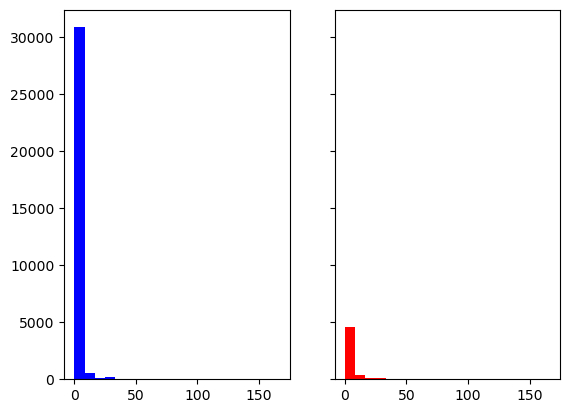

recoveries


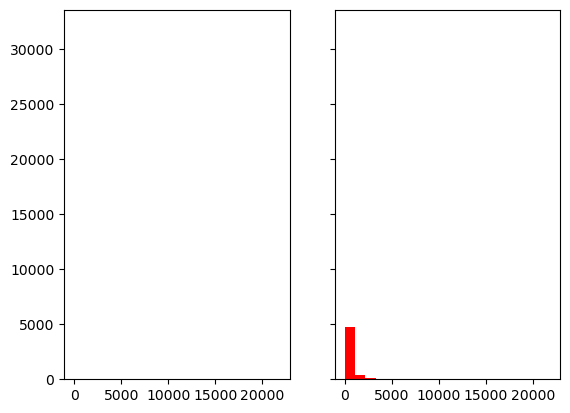

collection_recovery_fee


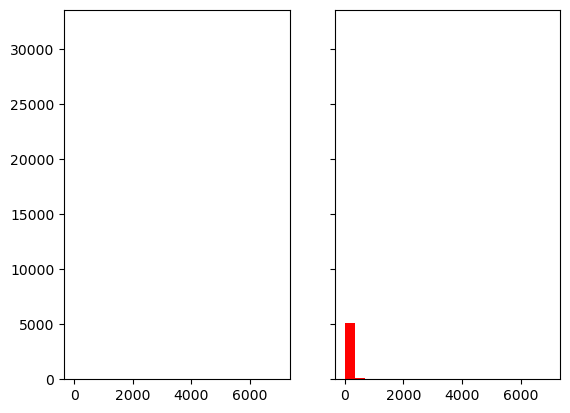

last_pymnt_amnt


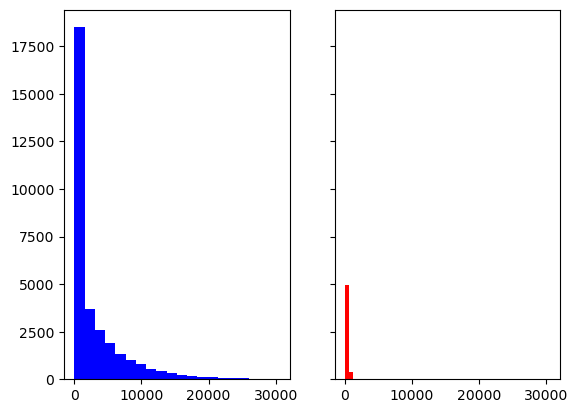

collections_12_mths_ex_med


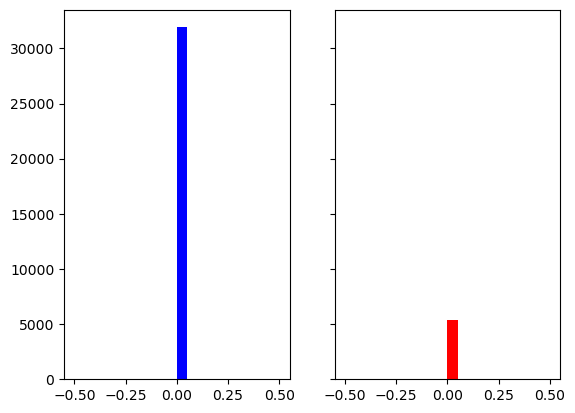

policy_code


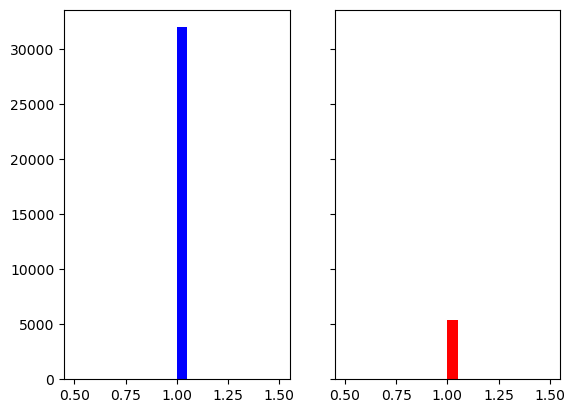

acc_now_delinq


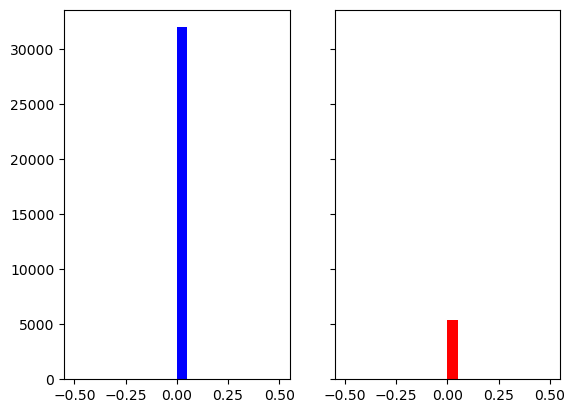

chargeoff_within_12_mths


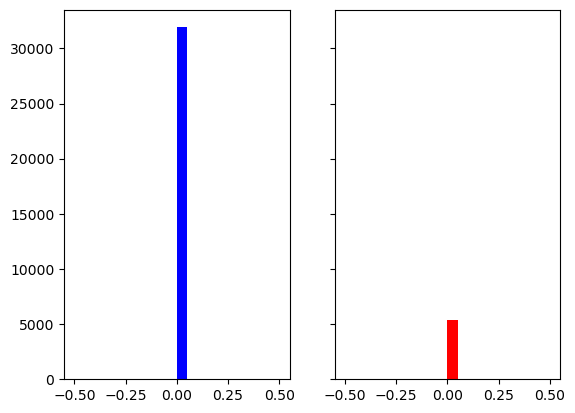

delinq_amnt


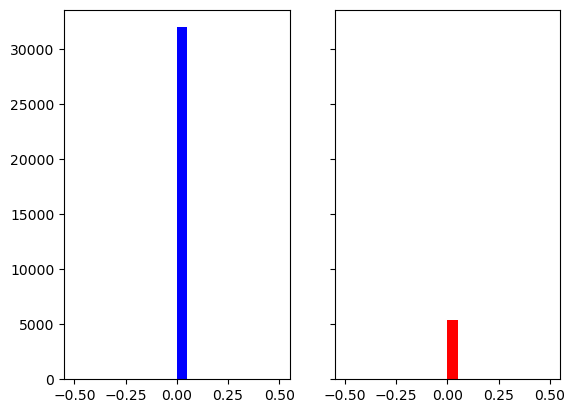

pub_rec_bankruptcies


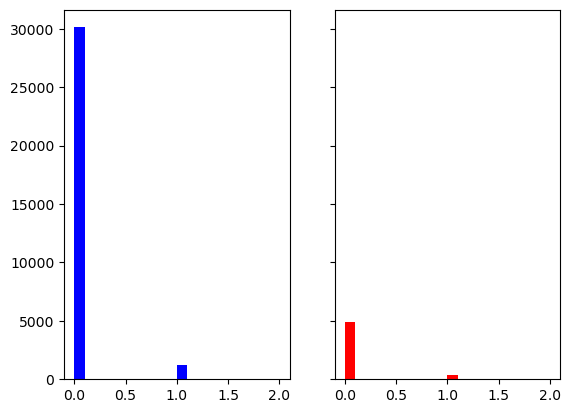

tax_liens


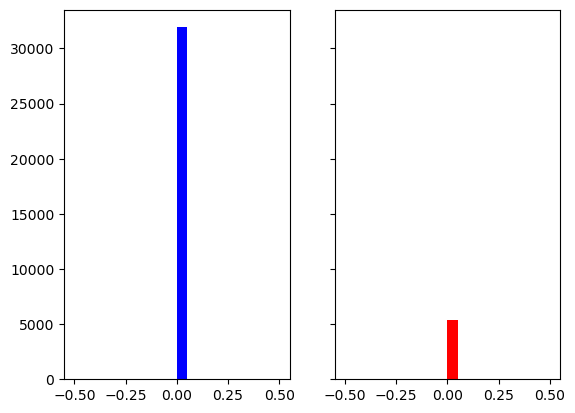

issue_year


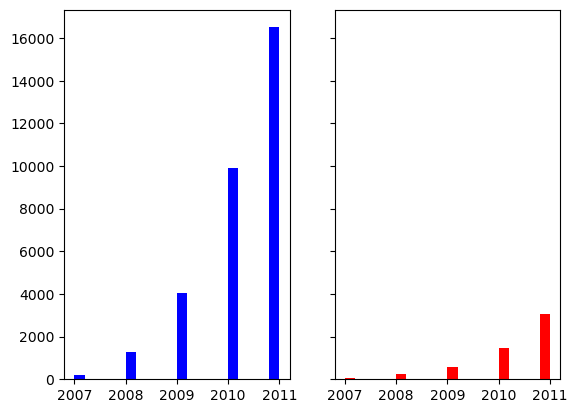

issue_month


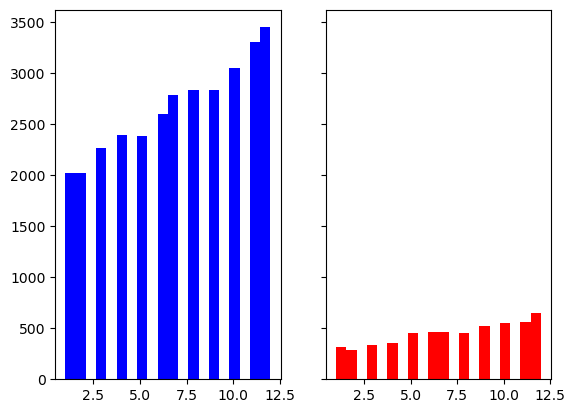

earliest_credit_line_year


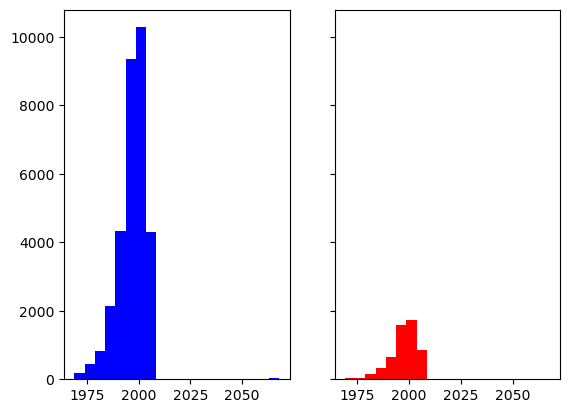

In [41]:
#Plotting histogram for Fully paid vs Charged off customer datasets for comparison
list1=list(loan1.select_dtypes(include=['float64','int64']))
for i in list1:
        print(i)
        fig,ax=plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,squeeze=False)
        loan_amount_total =ax[0][0].hist(loan2[i],bins=20,color='blue')
        loan_amount_chargedoff =ax[0][1].hist(loan1[i],bins=20,color='red')
        plt.show()
     

#From above observations on behaviour of defaulted customers vs non-defaulted customers, We can see the difference in the 'term','annual income','int_rate','dti','inq_last_6mths','open_acc'. 

id


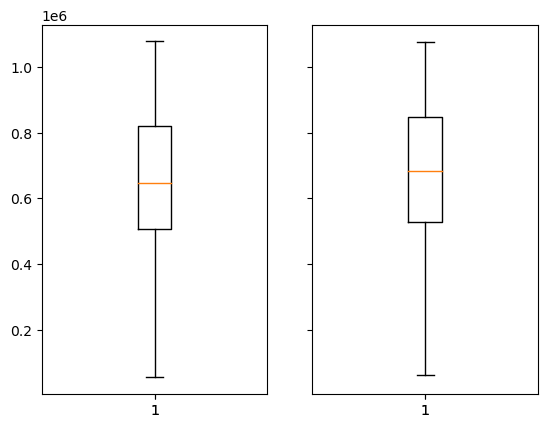

member_id


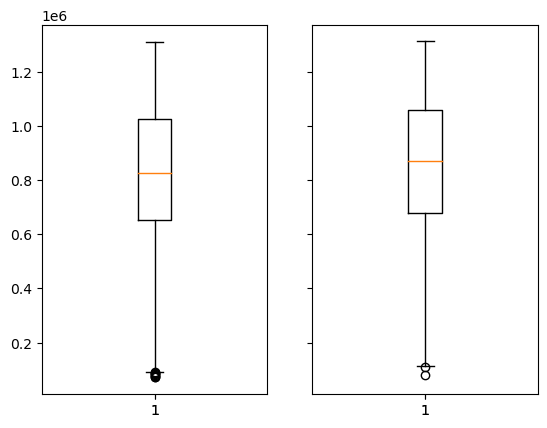

loan_amnt


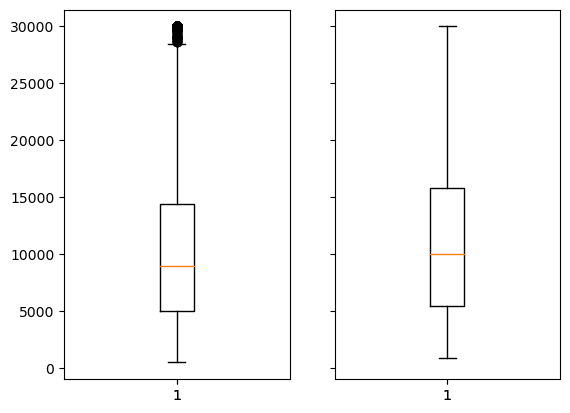

funded_amnt


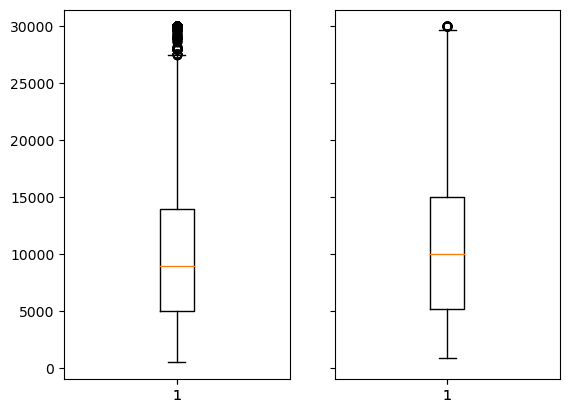

funded_amnt_inv


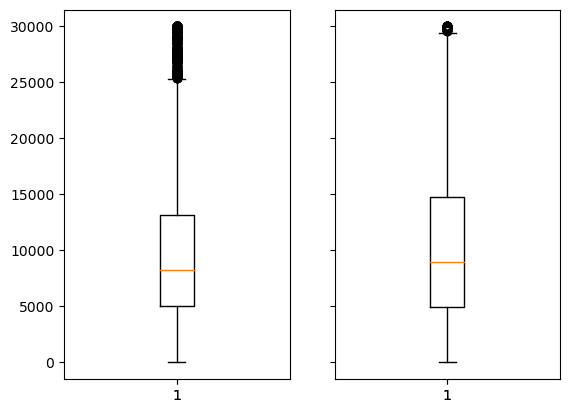

term


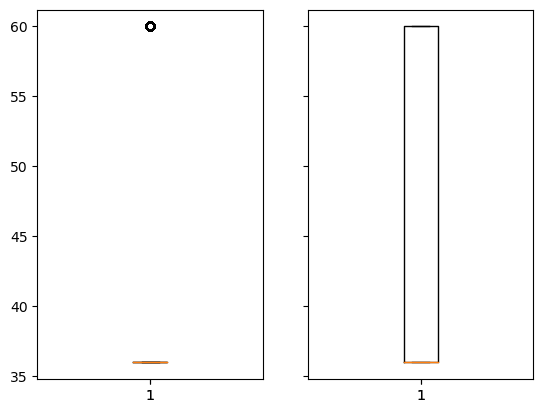

int_rate


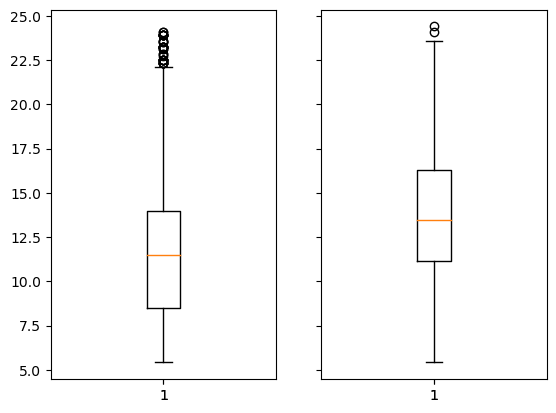

installment


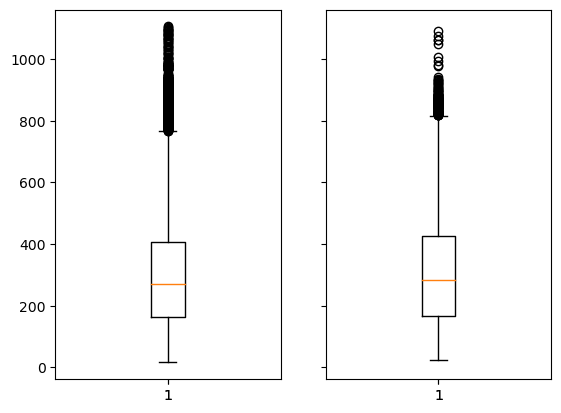

annual_inc


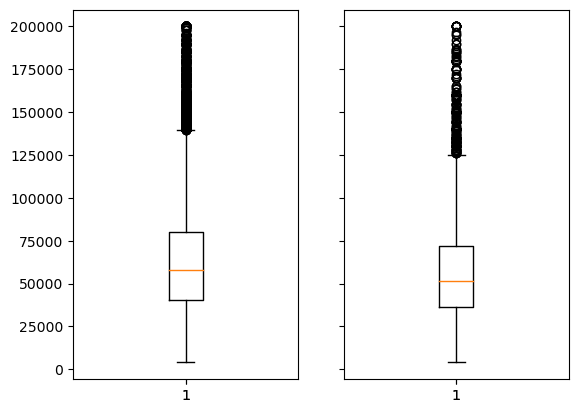

dti


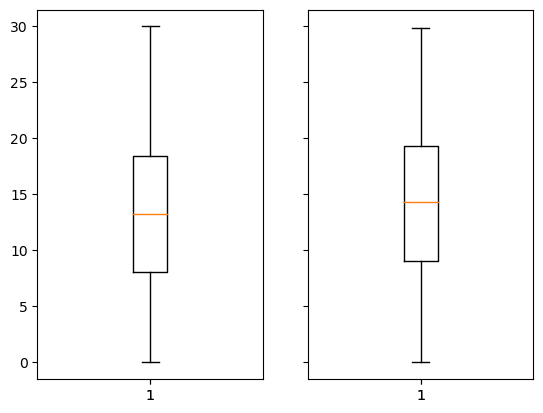

delinq_2yrs


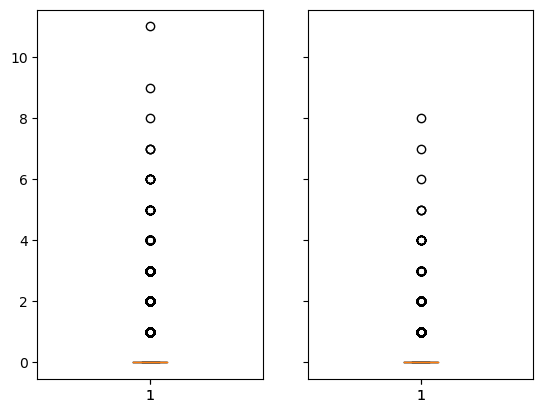

inq_last_6mths


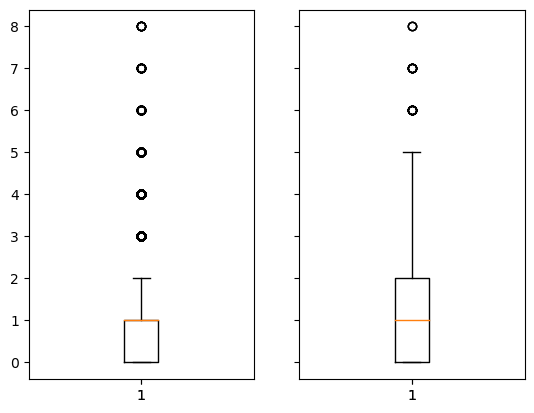

mths_since_last_delinq


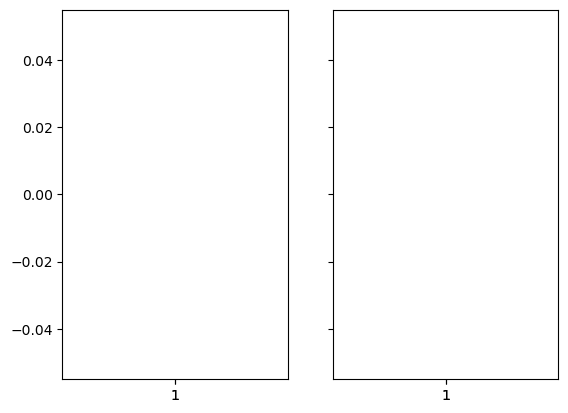

mths_since_last_record


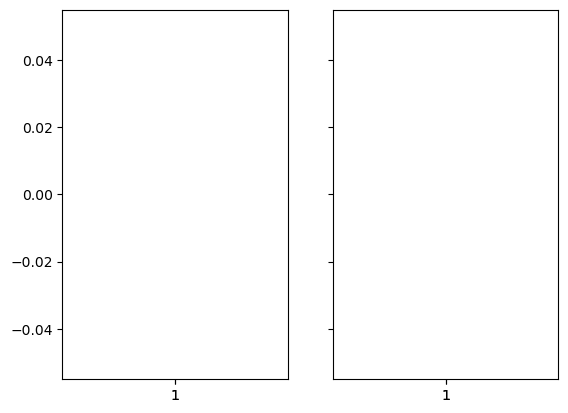

open_acc


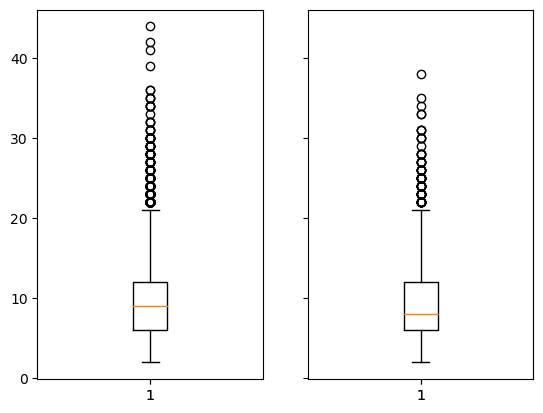

pub_rec


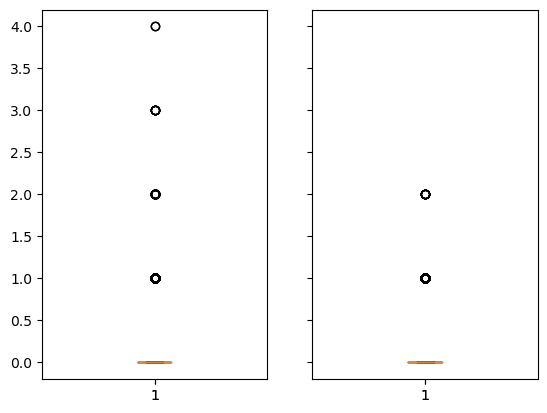

revol_bal


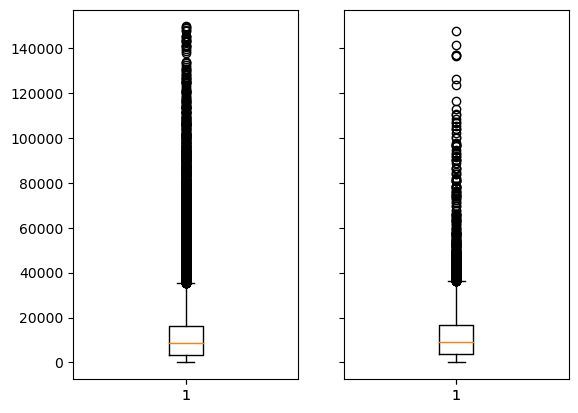

total_acc


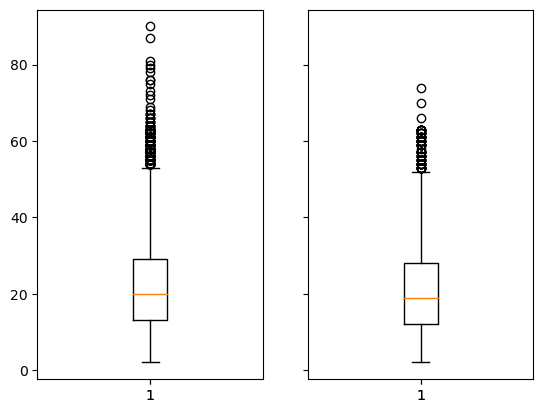

out_prncp


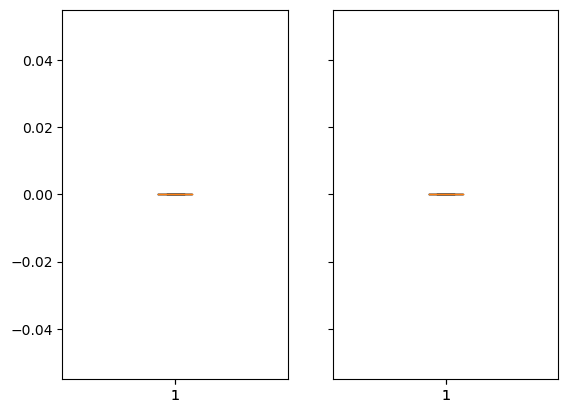

out_prncp_inv


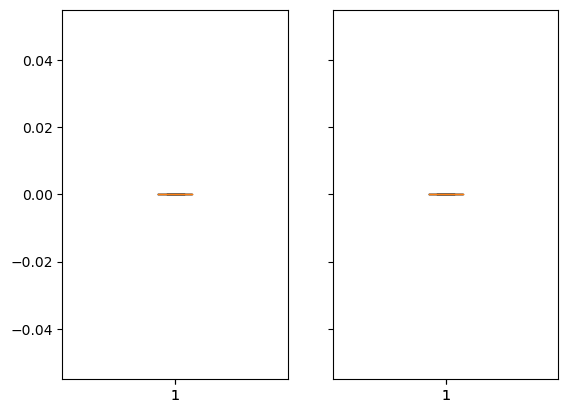

total_pymnt


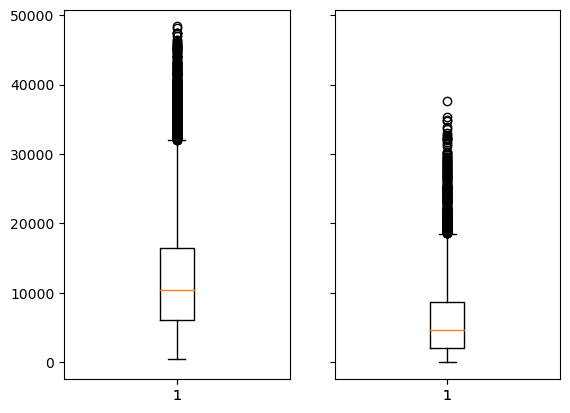

total_pymnt_inv


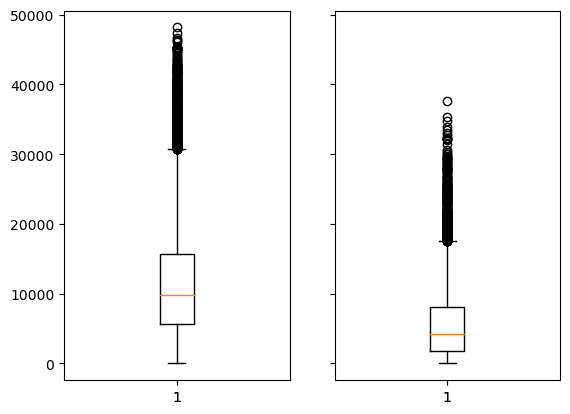

total_rec_prncp


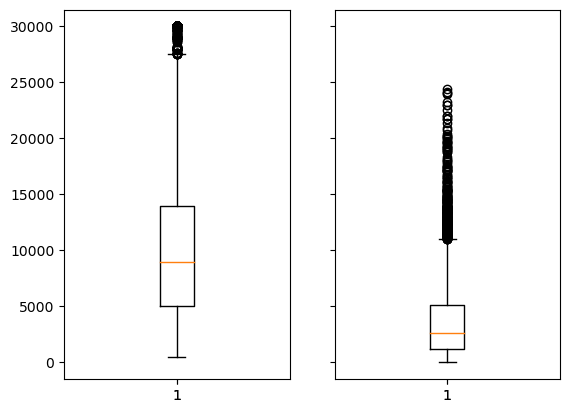

total_rec_int


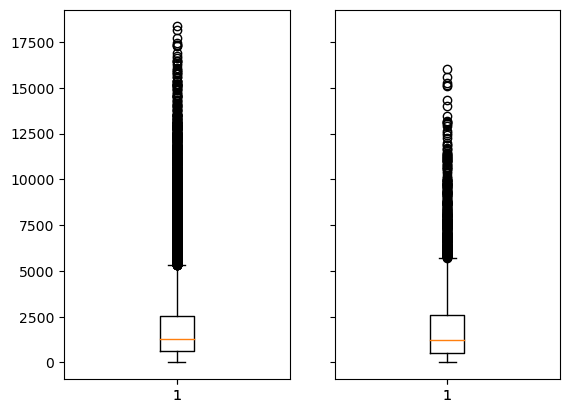

total_rec_late_fee


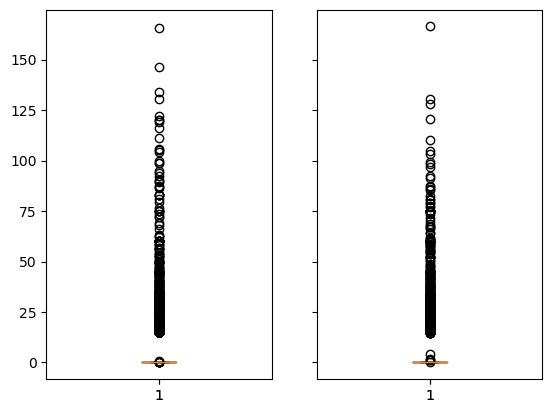

recoveries


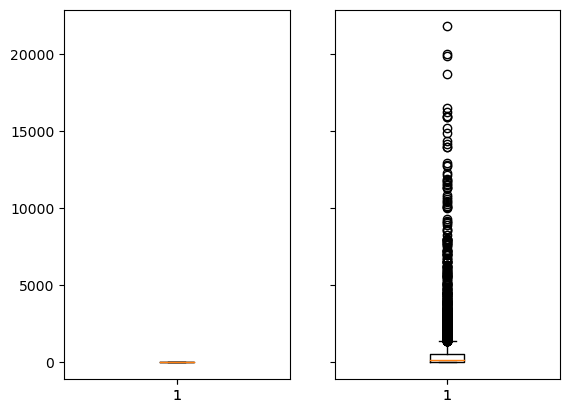

collection_recovery_fee


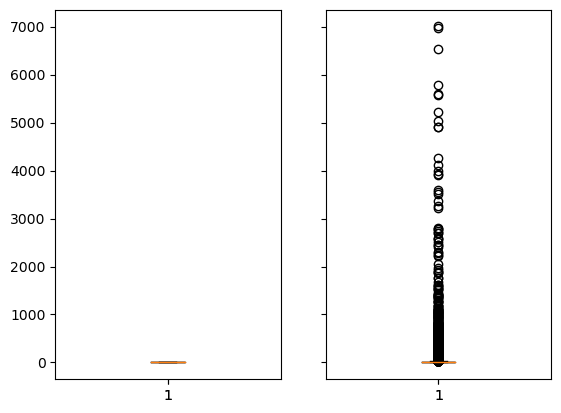

last_pymnt_amnt


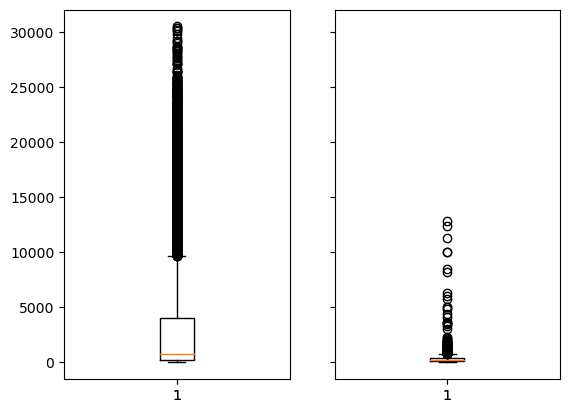

collections_12_mths_ex_med


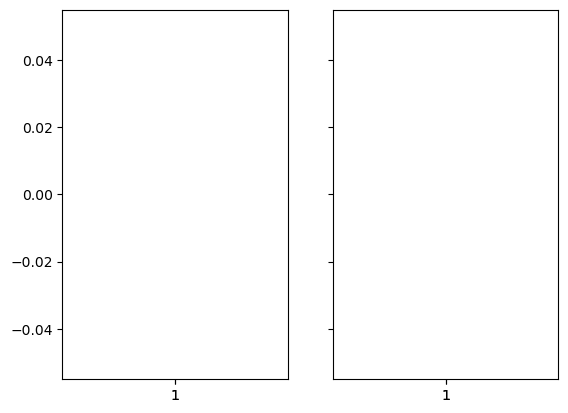

policy_code


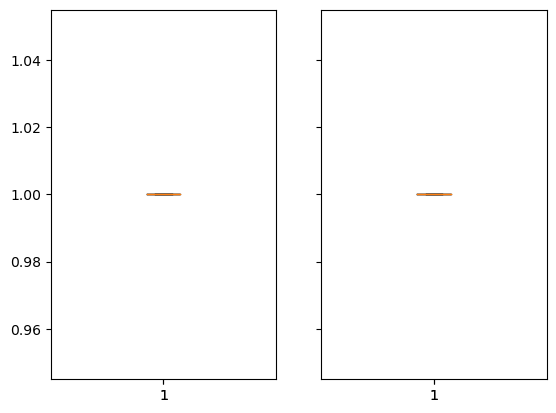

acc_now_delinq


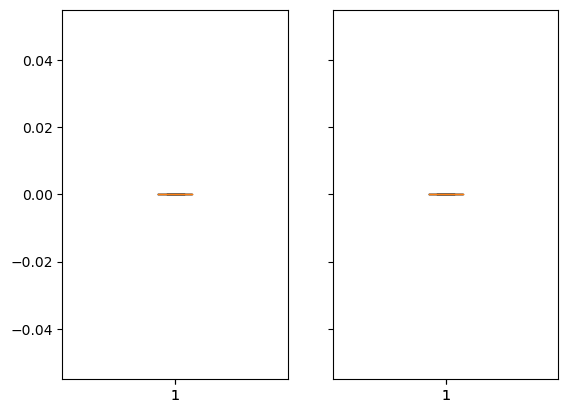

chargeoff_within_12_mths


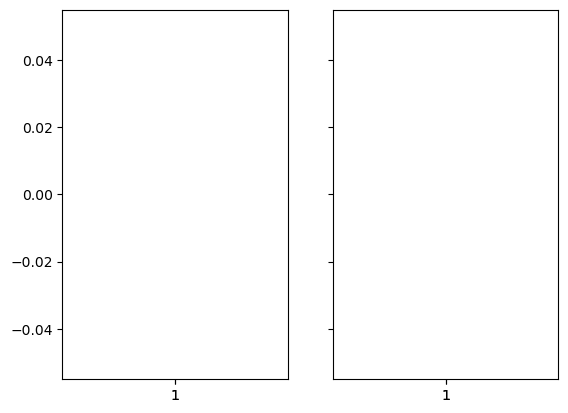

delinq_amnt


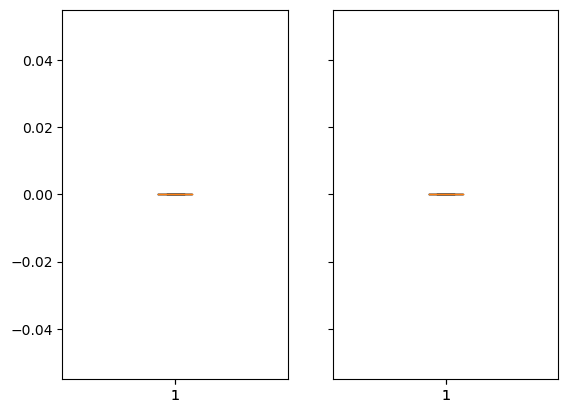

pub_rec_bankruptcies


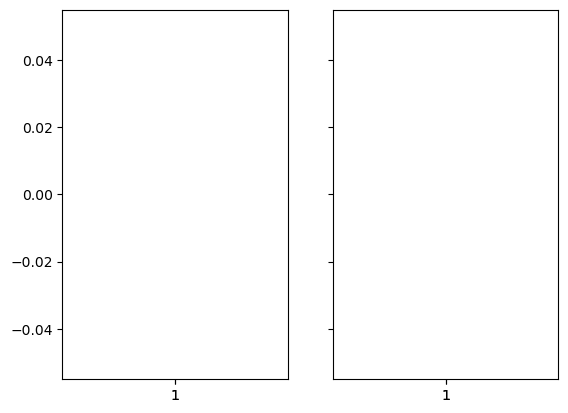

tax_liens


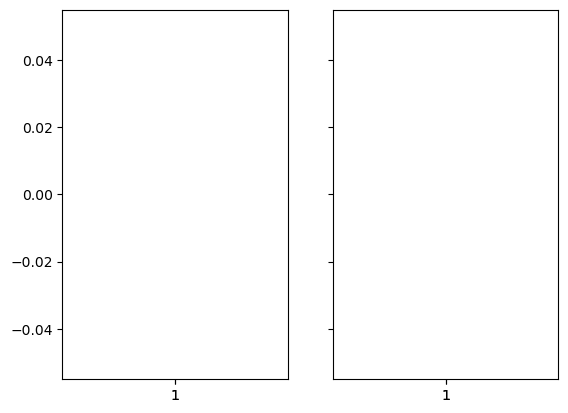

issue_year


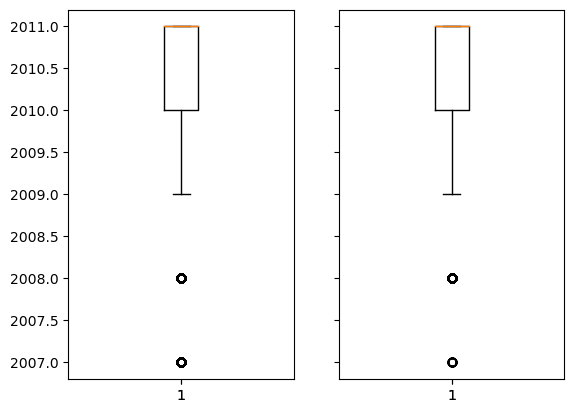

issue_month


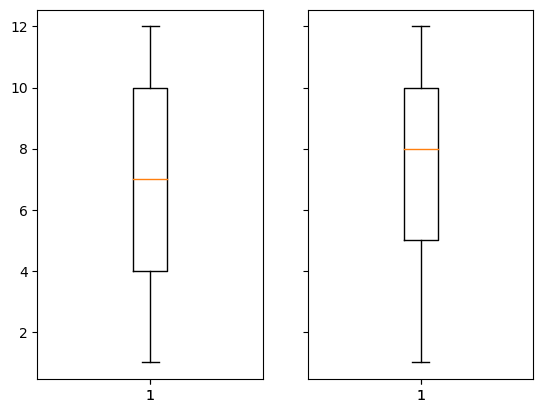

earliest_credit_line_year


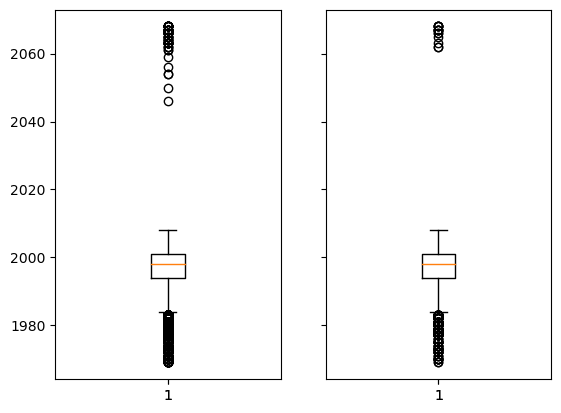

In [42]:
list1=list(loan.select_dtypes(include=['float64','int64']))
for i in list1:
        print(i)
        fig,ax=plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,squeeze=False)
        loan_amount_total =ax[0][0].boxplot(loan2[i])
        loan_amount_chargedoff=ax[0][1].boxplot(loan1[i])
        plt.show()
     

#From above box plot, it is observed that most of the behaviour is similar apart from 'term','int_rate','inq_last_6mths'.Excluding ovious things like recovery, paymnet etc., since they will always be less than Fully paid.
#The outliers for the analysis columns seem to be similar for total customers and chargedoff customers.So they weren't removed from dataset.
#Removing outliers above 0.99 percentile on loan amount


<AxesSubplot:xlabel='term', ylabel='count'>

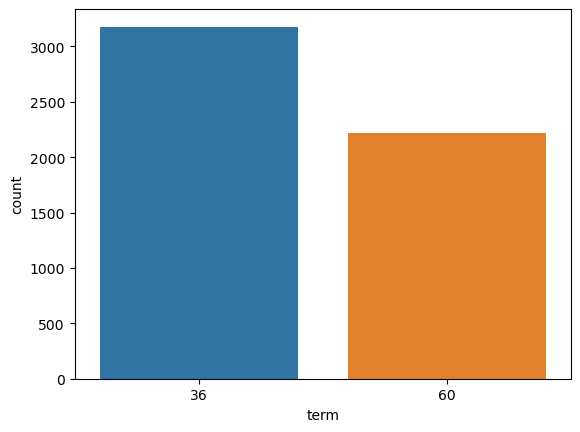

In [43]:
#Taking a clear look at 'term column' for charged of customers
palette_color=sns.color_palette('pastel')
sns.countplot(loan1.term)


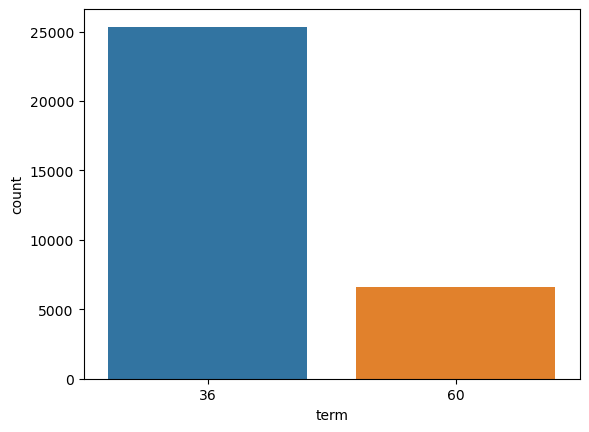

In [44]:
#Taking a clear look at 'term column' for Fully paid customers
palette_color=sns.color_palette('pastel')
sns.countplot(loan2.term)
plt.show()

#Observation1: Chances of default is higher in case of long-term loan.

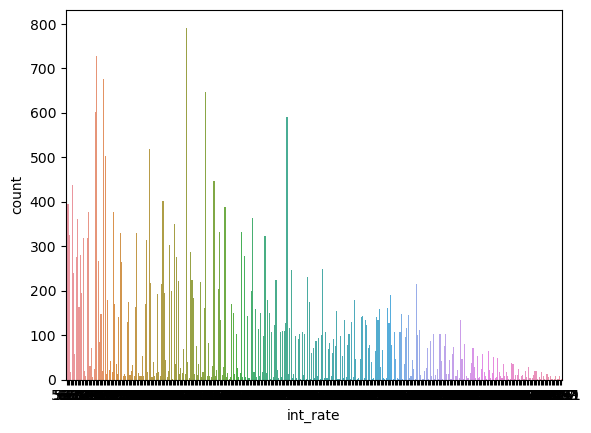

In [45]:
#Taking a clear look at 'int_rate'
palette_color=sns.color_palette('pastel')
sns.countplot(loan2.int_rate)
plt.show()

In [46]:
#When we reach this step it is evident that we need to bin the intrest rate values.Let's come to this step, if this is useful in future.

In [47]:
#Creating bins for intrest rates
loan['int_rate_bin']=pd.cut(loan['int_rate'],[0,5,7,10,12.5,16,20,25],labels=['0-5','5-7','7-10','10-12.5','12.5-16','16-20','20+'])
loan1['int_rate_bin']=pd.cut(loan1['int_rate'],[0,5,7,10,12.5,16,20,25],labels=['0-5','5-7','7-10','10-12.5','12.5-16','16-20','20+'])
loan2['int_rate_bin']=pd.cut(loan2['int_rate'],[0,5,7,10,12.5,16,20,25],labels=['0-5','5-7','7-10','10-12.5','12.5-16','16-20','20+'])

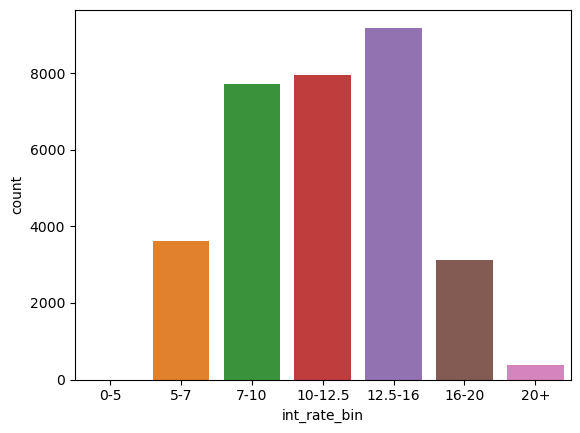

In [48]:
#Taking a clear look at 'int_rate' in fullypaid dataset
palette_color=sns.color_palette('pastel')
sns.countplot(loan2.int_rate_bin)
plt.show()

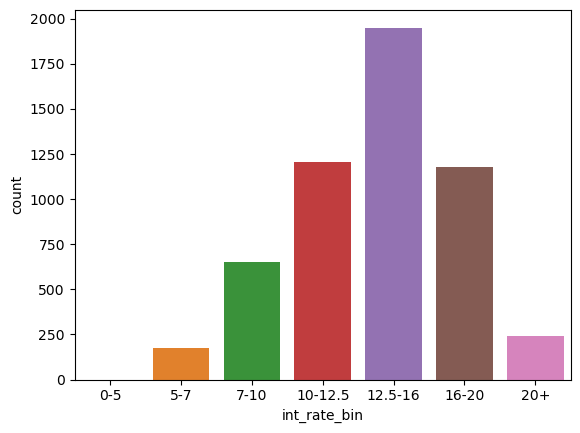

In [49]:
#Taking a clear look at 'int_rate' in chargedoff dataset
palette_color=sns.color_palette('pastel')
sns.countplot(loan1.int_rate_bin)
plt.show()

#More customers are present in 10-16 percent of intrest rate category, so more charge off will happen as well.

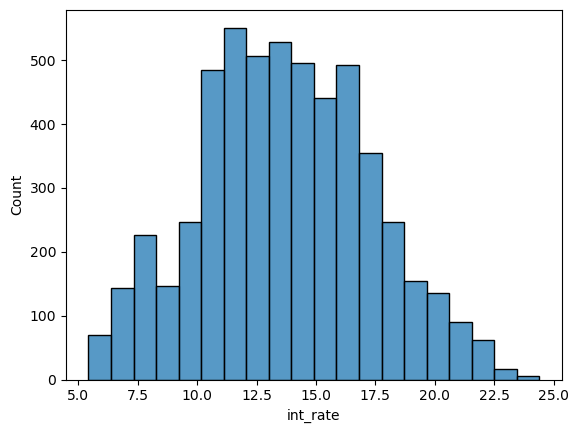

In [50]:
#Lets try histogram
#Taking a clear look at 'int_rate' for charged off customers.
palette_color=sns.color_palette('pastel')
sns.histplot(loan1.int_rate,bins=20)

plt.show()

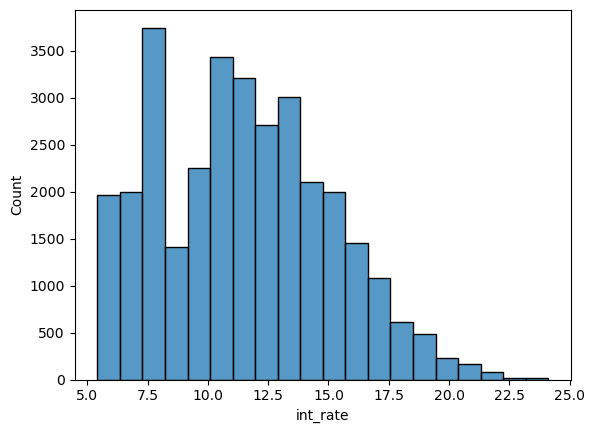

In [51]:

#Taking a clear look at 'int_rate' for fully paid the customers
palette_color=sns.color_palette('pastel')
sns.histplot(loan2.int_rate,bins=20)

plt.show()

#Observation2: Defaulting is happening across every intrest rates but its rampant from >10% intrest rate.

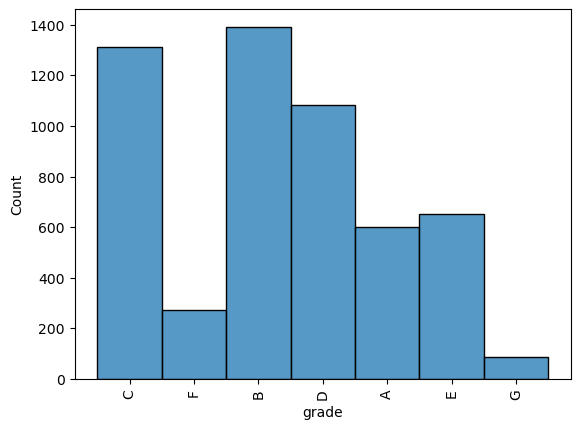

In [52]:

#Taking a clear look at 'sub_grade' for charged off customers.
palette_color=sns.color_palette('pastel')
sns.histplot(loan1.grade)
plt.xticks(rotation=90)

plt.show()

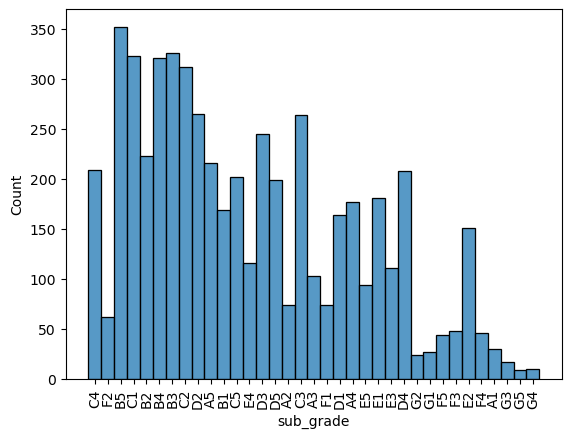

In [53]:

#Taking a clear look at 'sub_grade' for charged off customers.
palette_color=sns.color_palette('pastel')
sns.histplot(loan1.sub_grade)
plt.xticks(rotation=90)

plt.show()

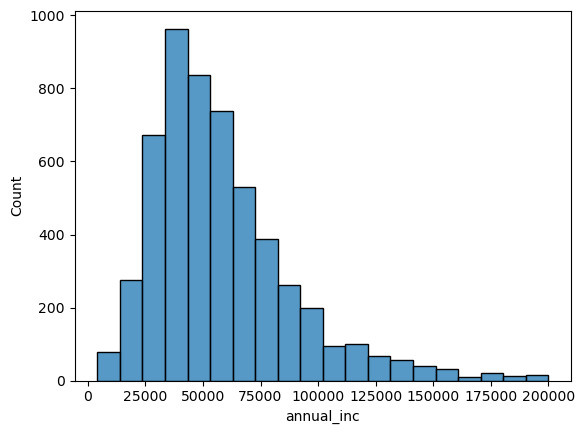

In [54]:
#Taking a clear look at 'annual_inc' in chargedoff dataset
palette_color=sns.color_palette('pastel')
sns.histplot(loan1.annual_inc,bins=20)
plt.show()

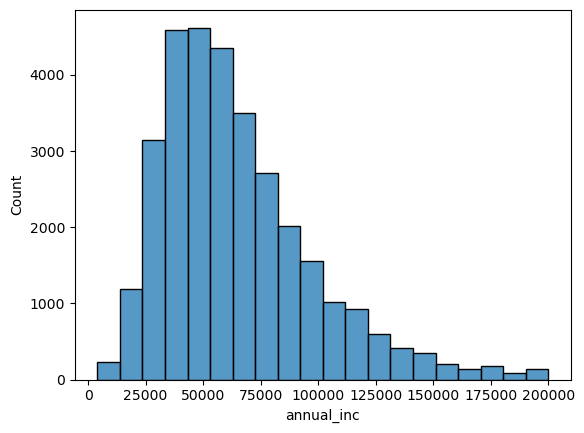

In [55]:
#Taking a clear look at 'annual_inc' in chargedoff dataset
palette_color=sns.color_palette('pastel')
sns.histplot(loan2.annual_inc,bins=20)
plt.show()

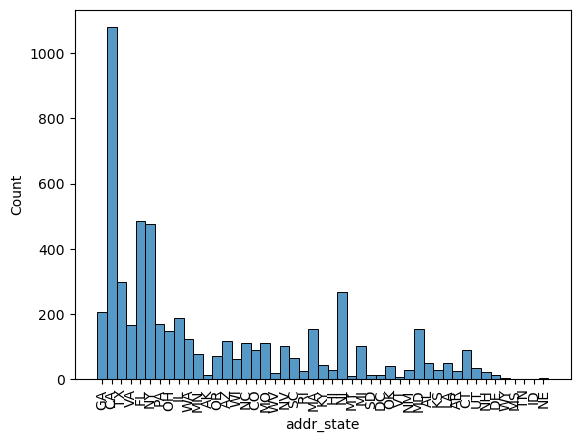

In [56]:
#Taking a clear look at 'addr_state' for charged off customers.
palette_color=sns.color_palette('pastel')
sns.histplot(loan1.addr_state)
plt.xticks(rotation=90)

plt.show()

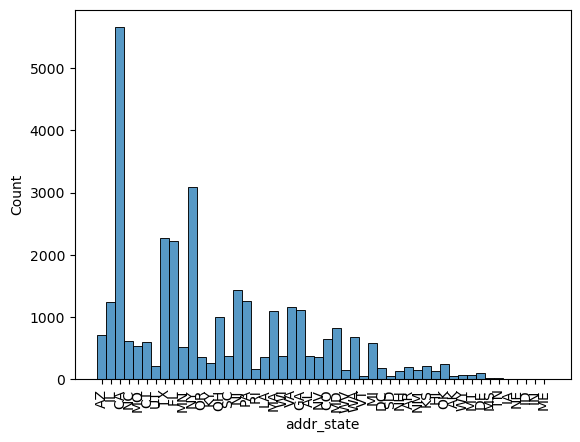

In [57]:
#Taking a clear look at 'addr_state' for charged off customers.
palette_color=sns.color_palette('pastel')
sns.histplot(loan2.addr_state)
plt.xticks(rotation=90)

plt.show()

In [58]:
#checking which state has more charged off customers.
st_default = loan1.groupby('addr_state')['loan_status'].count().reset_index()
st_default.head(15)

addr_state  loan_status
0          AK           14
1          AL           49
2          AR           27
3          AZ          119
4          CA         1079
5          CO           91
6          CT           90
7          DC           14
8          DE           12
9          FL          484
10         GA          207
11         HI           28
12         ID            1
13         IL          189
14         KS           29

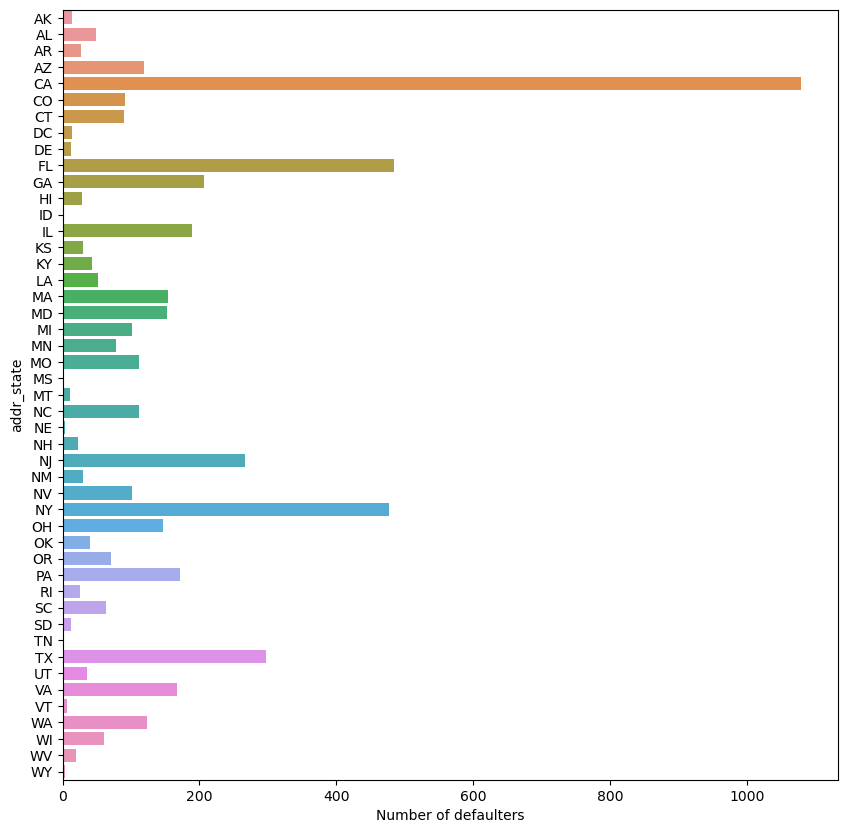

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=st_default)
plt.xlabel('Number of defaulters')
plt.show()

In [60]:
#checking which state has more charged off customers.
statedef=loan.groupby(['addr_state','loan_status']).loan_status.count().unstack(0).fillna(0)
statedef.head()

addr_state     AK     AL     AR     AZ      CA     CO     CT     DC    DE  \
loan_status                                                                 
Charged Off  14.0   49.0   27.0  119.0  1079.0   91.0   90.0   14.0  12.0   
Current       1.0   13.0   10.0   30.0   138.0   24.0   22.0    2.0   0.0   
Fully Paid   60.0  371.0  203.0  707.0  5654.0  646.0  593.0  190.0  99.0   

addr_state       FL      GA     HI   IA   ID      IL   IN     KS     KY  \
loan_status                                                               
Charged Off   484.0   207.0   28.0  0.0  1.0   189.0  0.0   29.0   43.0   
Current        76.0    33.0    7.0  0.0  0.0    44.0  0.0   16.0   12.0   
Fully Paid   2215.0  1110.0  135.0  5.0  5.0  1239.0  9.0  219.0  264.0   

addr_state      LA      MA     MD   ME     MI     MN     MO    MS    MT  \
loan_status                                                               
Charged Off   51.0   154.0  153.0  0.0  101.0   78.0  112.0   2.0  10.0   
Current        8.0    39.0   25.0  0.0   15.0   10.0   16.0   0.0   1.0   
Fully Paid   363.0  1105.0  831.0  3.0  583.0  517.0  541.0  17.0  71.0   

addr_state      NC   NE     NH      NJ     NM     NV      NY     OH     OK  \
loan_status                                                                  
Charged Off  111.0  3.0   23.0   267.0   30.0  102.0   477.0  147.0   40.0   
Current       37.0  0.0    5.0    49.0    5.0   14.0   108.0   42.0   12.0   
Fully Paid   611.0  2.0  134.0  1439.0  148.0  363.0  3087.0  998.0  240.0   

addr_state      OR      PA     RI     SC    SD    TN      TX     UT      VA  \
loan_status                                                                   
Charged Off   71.0   171.0   25.0   64.0  12.0   2.0   297.0   36.0   167.0   
Current       14.0    44.0    4.0   13.0   2.0   0.0    61.0    6.0    33.0   
Fully Paid   362.0  1266.0  165.0  382.0  50.0  15.0  2266.0  207.0  1159.0   

addr_state     VT     WA     WI     WV    WY  
loan_status                                   
Charged Off   6.0  124.0   61.0   20.0   3.0  
Current       1.0   19.0   19.0    4.0   3.0  
Fully Paid   46.0  673.0  367.0  147.0  76.0

In [61]:
statedef_t=statedef.T
statedef_t.head()

loan_status  Charged Off  Current  Fully Paid
addr_state                                   
AK                  14.0      1.0        60.0
AL                  49.0     13.0       371.0
AR                  27.0     10.0       203.0
AZ                 119.0     30.0       707.0
CA                1079.0    138.0      5654.0

In [62]:
#Checking the proportions for easy understanding
statedef_t['Total']=statedef_t['Current']+statedef_t['Charged Off']+statedef_t['Fully Paid']
statedef_t['proportions_char_off']=statedef_t['Charged Off']/statedef_t['Total']
statedef_t
statedef_t.reset_index()
statedef_t.sort_values('Total',ascending=False)


loan_status  Charged Off  Current  Fully Paid   Total  proportions_char_off
addr_state                                                                 
CA                1079.0    138.0      5654.0  6871.0              0.157037
NY                 477.0    108.0      3087.0  3672.0              0.129902
FL                 484.0     76.0      2215.0  2775.0              0.174414
TX                 297.0     61.0      2266.0  2624.0              0.113186
NJ                 267.0     49.0      1439.0  1755.0              0.152137
PA                 171.0     44.0      1266.0  1481.0              0.115463
IL                 189.0     44.0      1239.0  1472.0              0.128397
VA                 167.0     33.0      1159.0  1359.0              0.122884
GA                 207.0     33.0      1110.0  1350.0              0.153333
MA                 154.0     39.0      1105.0  1298.0              0.118644
OH                 147.0     42.0       998.0  1187.0              0.123842
MD                 153.0     25.0       831.0  1009.0              0.151635
AZ                 119.0     30.0       707.0   856.0              0.139019
WA                 124.0     19.0       673.0   816.0              0.151961
CO                  91.0     24.0       646.0   761.0              0.119580
NC                 111.0     37.0       611.0   759.0              0.146245
CT                  90.0     22.0       593.0   705.0              0.127660
MI                 101.0     15.0       583.0   699.0              0.144492
MO                 112.0     16.0       541.0   669.0              0.167414
MN                  78.0     10.0       517.0   605.0              0.128926
NV                 102.0     14.0       363.0   479.0              0.212944
SC                  64.0     13.0       382.0   459.0              0.139434
WI                  61.0     19.0       367.0   447.0              0.136465
OR                  71.0     14.0       362.0   447.0              0.158837
AL                  49.0     13.0       371.0   433.0              0.113164
LA                  51.0      8.0       363.0   422.0              0.120853
KY                  43.0     12.0       264.0   319.0              0.134796
OK                  40.0     12.0       240.0   292.0              0.136986
KS                  29.0     16.0       219.0   264.0              0.109848
UT                  36.0      6.0       207.0   249.0              0.144578
AR                  27.0     10.0       203.0   240.0              0.112500
DC                  14.0      2.0       190.0   206.0              0.067961
RI                  25.0      4.0       165.0   194.0              0.128866
NM                  30.0      5.0       148.0   183.0              0.163934
WV                  20.0      4.0       147.0   171.0              0.116959
HI                  28.0      7.0       135.0   170.0              0.164706
NH                  23.0      5.0       134.0   162.0              0.141975
DE                  12.0      0.0        99.0   111.0              0.108108
MT                  10.0      1.0        71.0    82.0              0.121951
WY                   3.0      3.0        76.0    82.0              0.036585
AK                  14.0      1.0        60.0    75.0              0.186667
SD                  12.0      2.0        50.0    64.0              0.187500
VT                   6.0      1.0        46.0    53.0              0.113208
MS                   2.0      0.0        17.0    19.0              0.105263
TN                   2.0      0.0        15.0    17.0              0.117647
IN                   0.0      0.0         9.0     9.0              0.000000
ID                   1.0      0.0         5.0     6.0              0.166667
NE                   3.0      0.0         2.0     5.0              0.600000
IA                   0.0      0.0         5.0     5.0              0.000000
ME                   0.0      0.0         3.0     3.0              0.000000

In [63]:
statedef_t.sort_values('proportions_char_off',ascending=False)

loan_status  Charged Off  Current  Fully Paid   Total  proportions_char_off
addr_state                                                                 
NE                   3.0      0.0         2.0     5.0              0.600000
NV                 102.0     14.0       363.0   479.0              0.212944
SD                  12.0      2.0        50.0    64.0              0.187500
AK                  14.0      1.0        60.0    75.0              0.186667
FL                 484.0     76.0      2215.0  2775.0              0.174414
MO                 112.0     16.0       541.0   669.0              0.167414
ID                   1.0      0.0         5.0     6.0              0.166667
HI                  28.0      7.0       135.0   170.0              0.164706
NM                  30.0      5.0       148.0   183.0              0.163934
OR                  71.0     14.0       362.0   447.0              0.158837
CA                1079.0    138.0      5654.0  6871.0              0.157037
GA                 207.0     33.0      1110.0  1350.0              0.153333
NJ                 267.0     49.0      1439.0  1755.0              0.152137
WA                 124.0     19.0       673.0   816.0              0.151961
MD                 153.0     25.0       831.0  1009.0              0.151635
NC                 111.0     37.0       611.0   759.0              0.146245
UT                  36.0      6.0       207.0   249.0              0.144578
MI                 101.0     15.0       583.0   699.0              0.144492
NH                  23.0      5.0       134.0   162.0              0.141975
SC                  64.0     13.0       382.0   459.0              0.139434
AZ                 119.0     30.0       707.0   856.0              0.139019
OK                  40.0     12.0       240.0   292.0              0.136986
WI                  61.0     19.0       367.0   447.0              0.136465
KY                  43.0     12.0       264.0   319.0              0.134796
NY                 477.0    108.0      3087.0  3672.0              0.129902
MN                  78.0     10.0       517.0   605.0              0.128926
RI                  25.0      4.0       165.0   194.0              0.128866
IL                 189.0     44.0      1239.0  1472.0              0.128397
CT                  90.0     22.0       593.0   705.0              0.127660
OH                 147.0     42.0       998.0  1187.0              0.123842
VA                 167.0     33.0      1159.0  1359.0              0.122884
MT                  10.0      1.0        71.0    82.0              0.121951
LA                  51.0      8.0       363.0   422.0              0.120853
CO                  91.0     24.0       646.0   761.0              0.119580
MA                 154.0     39.0      1105.0  1298.0              0.118644
TN                   2.0      0.0        15.0    17.0              0.117647
WV                  20.0      4.0       147.0   171.0              0.116959
PA                 171.0     44.0      1266.0  1481.0              0.115463
VT                   6.0      1.0        46.0    53.0              0.113208
TX                 297.0     61.0      2266.0  2624.0              0.113186
AL                  49.0     13.0       371.0   433.0              0.113164
AR                  27.0     10.0       203.0   240.0              0.112500
KS                  29.0     16.0       219.0   264.0              0.109848
DE                  12.0      0.0        99.0   111.0              0.108108
MS                   2.0      0.0        17.0    19.0              0.105263
DC                  14.0      2.0       190.0   206.0              0.067961
WY                   3.0      3.0        76.0    82.0              0.036585
ME                   0.0      0.0         3.0     3.0              0.000000
IN                   0.0      0.0         9.0     9.0              0.000000
IA                   0.0      0.0         5.0     5.0              0.000000

#We can observe that Nevada is having highest proprtion of charge off.
#We can also observe that 'CA','FL','NJ','GA','MD'. have >0.15 charge off proportions and total>1000
#Taking a clear look at 'addr_state' for charged off customers.


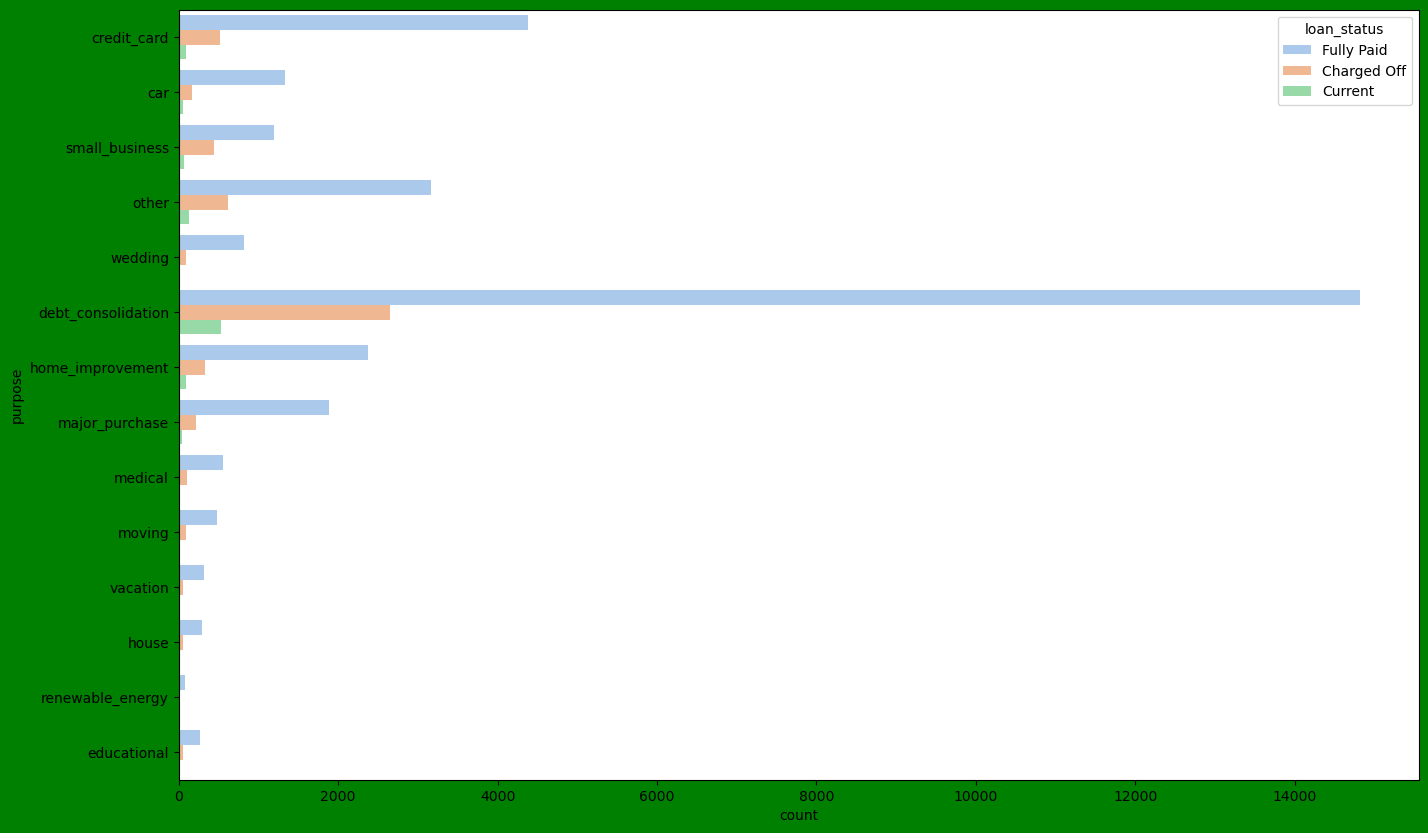

In [64]:
#Analysis on purpose of loan.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="purpose",data=loan,hue='loan_status',palette='pastel')
plt.show()

Most of the customers have taken loans for debt_consolidation purpose.

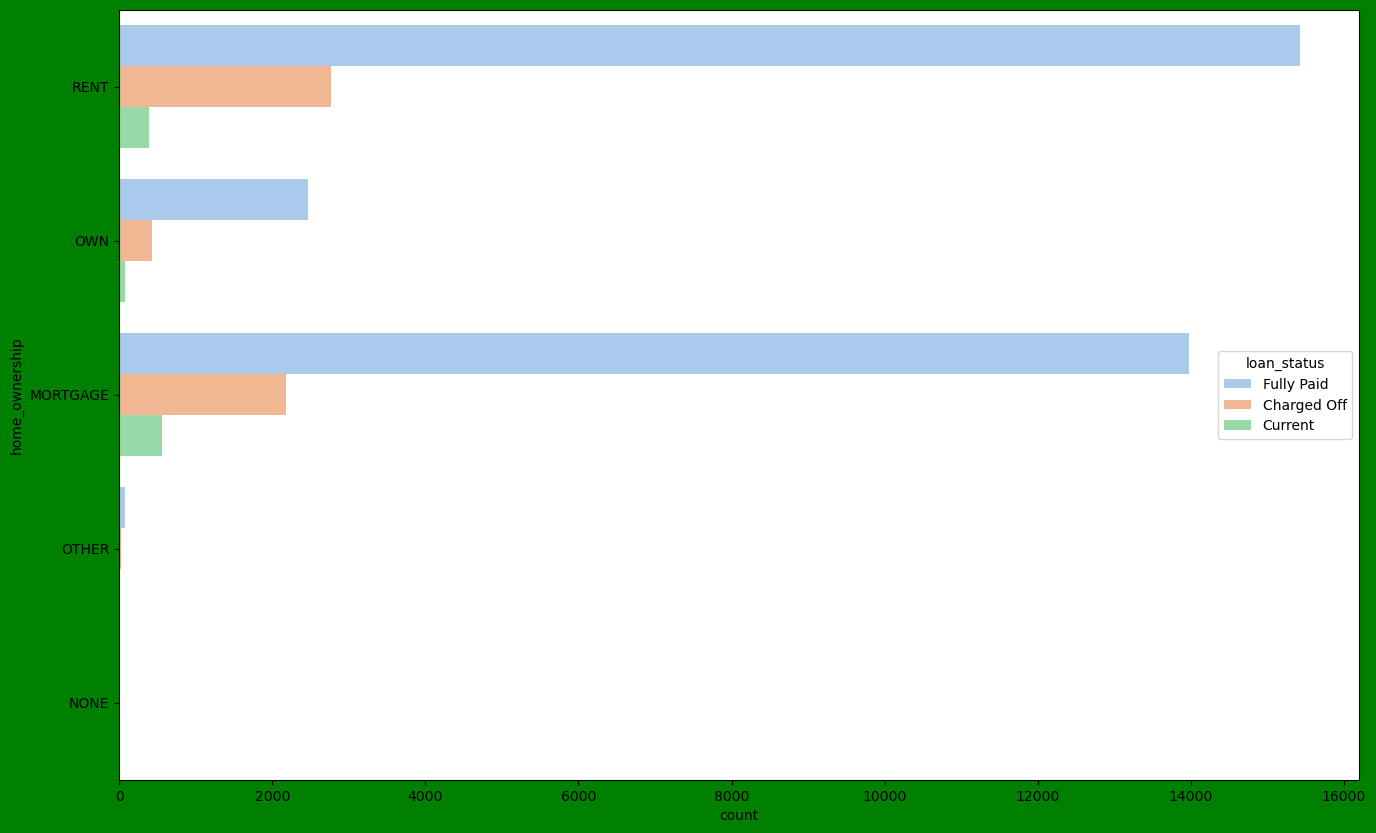

In [65]:
#Analysis on home_ownership.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="home_ownership",data=loan,hue='loan_status',palette='pastel')
plt.show()

Most of the customers are having their accomodation at mortgage or Rent

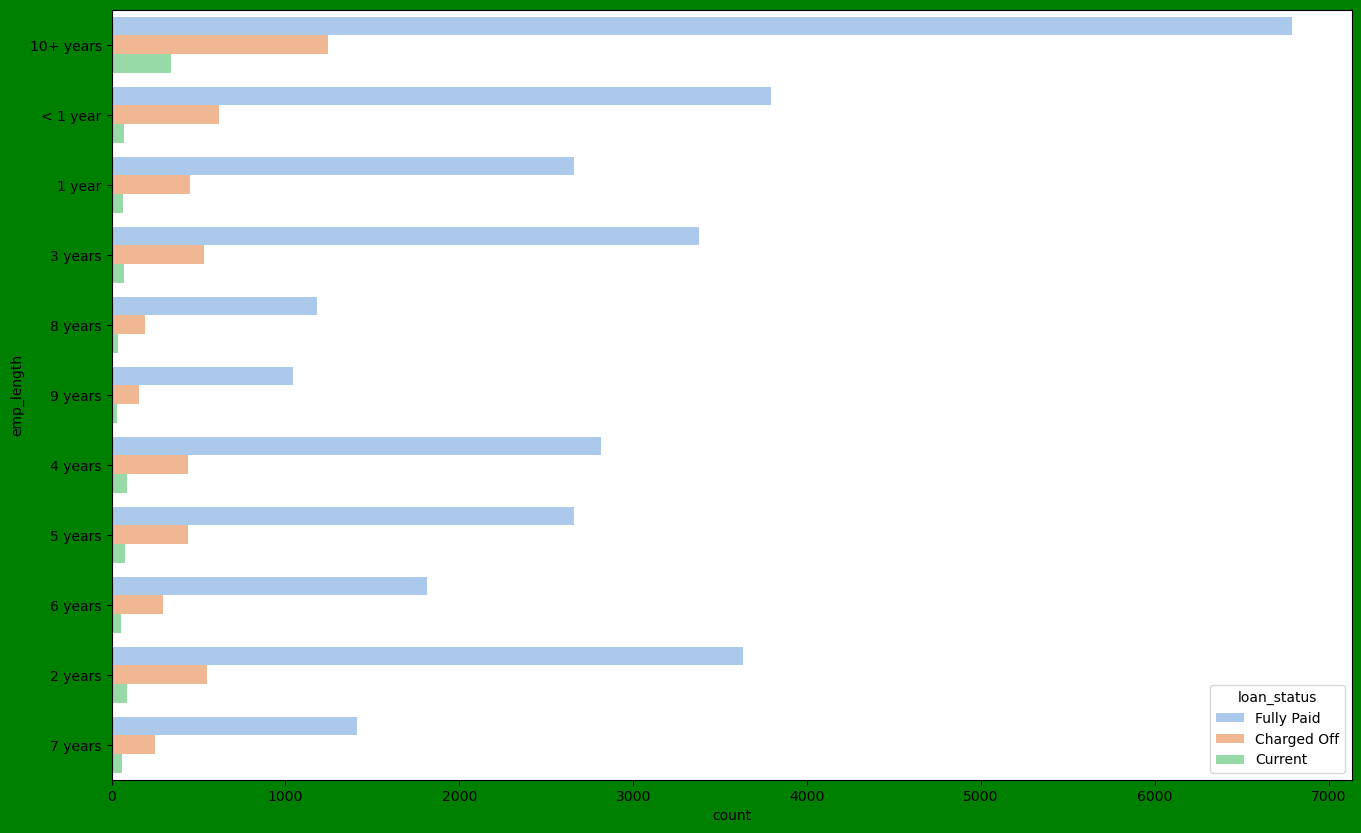

In [66]:
#Analysis on emp_length.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="emp_length",data=loan,hue='loan_status',palette='pastel')
plt.show()

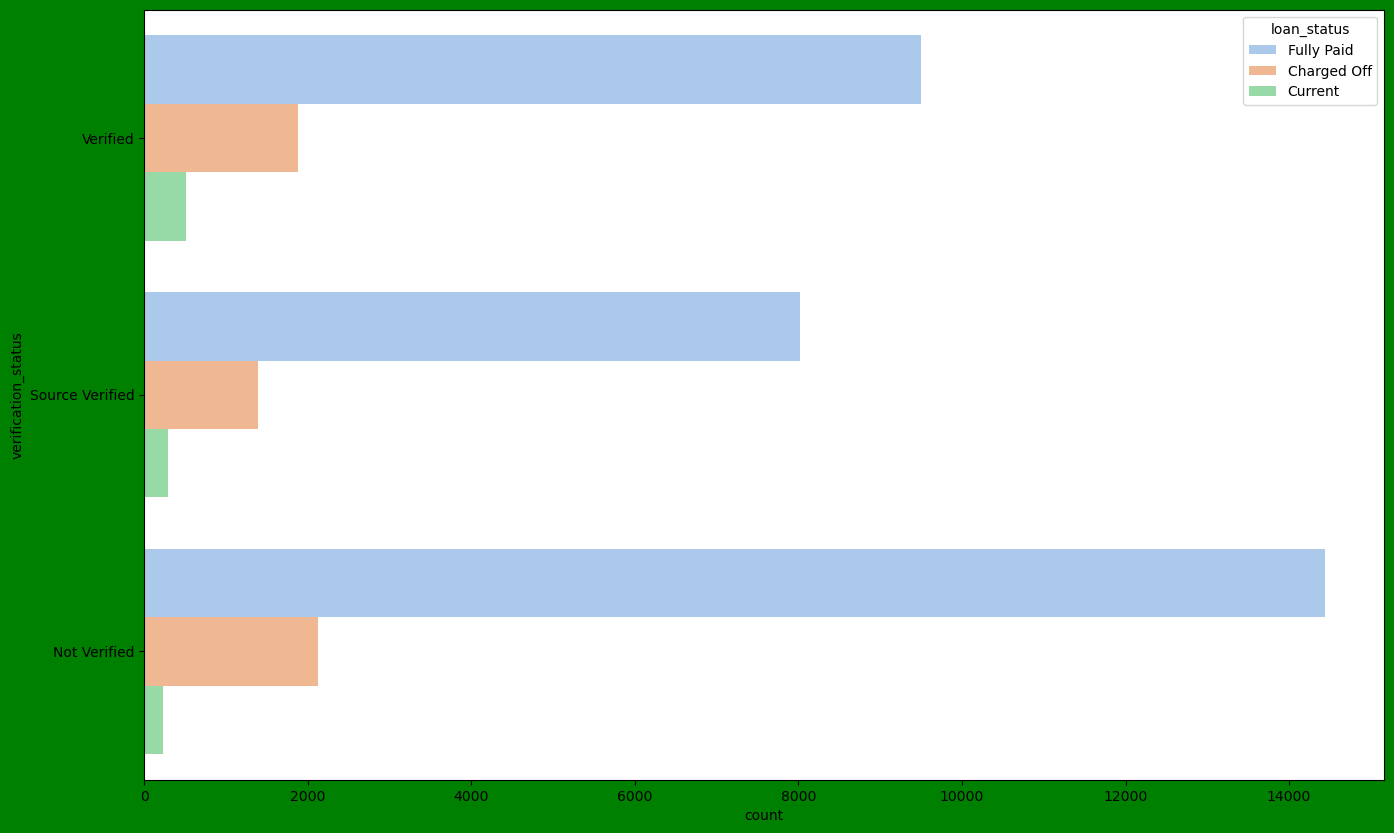

In [67]:
#Analysis on emp_length.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="verification_status",data=loan,hue='loan_status',palette='pastel')
plt.show()

#verification isn't playing any role.

In [68]:
#Creating bins for annual income
loan['annual_inc_bin']=pd.cut(loan['annual_inc'],[0,20000,40000,60000,80000,100000,200000],labels=['0-20K','20K-40K','40K-60K','60K-80K','80K-100K','100K-200K'])
loan1['annual_inc_bin']=pd.cut(loan1['annual_inc'],[0,20000,40000,60000,80000,100000,200000],labels=['0-20K','20K-40K','40K-60K','60K-80K','80K-100K','100K-200K'])
loan2['annual_inc_bin']=pd.cut(loan2['annual_inc'],[0,20000,40000,60000,80000,100000,200000],labels=['0-20K','20K-40K','40K-60K','60K-80K','80K-100K','100K-200K'])

#creating bins for dti
loan['dti_bin']=pd.cut(loan['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','20-25'])
loan1['dti_bin']=pd.cut(loan1['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','20-25'])
loan2['dti_bin']=pd.cut(loan2['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','20-25'])

#Creating bins for annual income
loan['loan_amnt_bin']=pd.cut(loan['loan_amnt'],[0,5000,10000,15000,20000,25000,30000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K'])
loan1['loan_amnt_bin']=pd.cut(loan1['loan_amnt'],[0,5000,10000,15000,20000,25000,30000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K'])
loan2['loan_amnt_bin']=pd.cut(loan2['loan_amnt'],[0,5000,10000,15000,20000,25000,30000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K'])

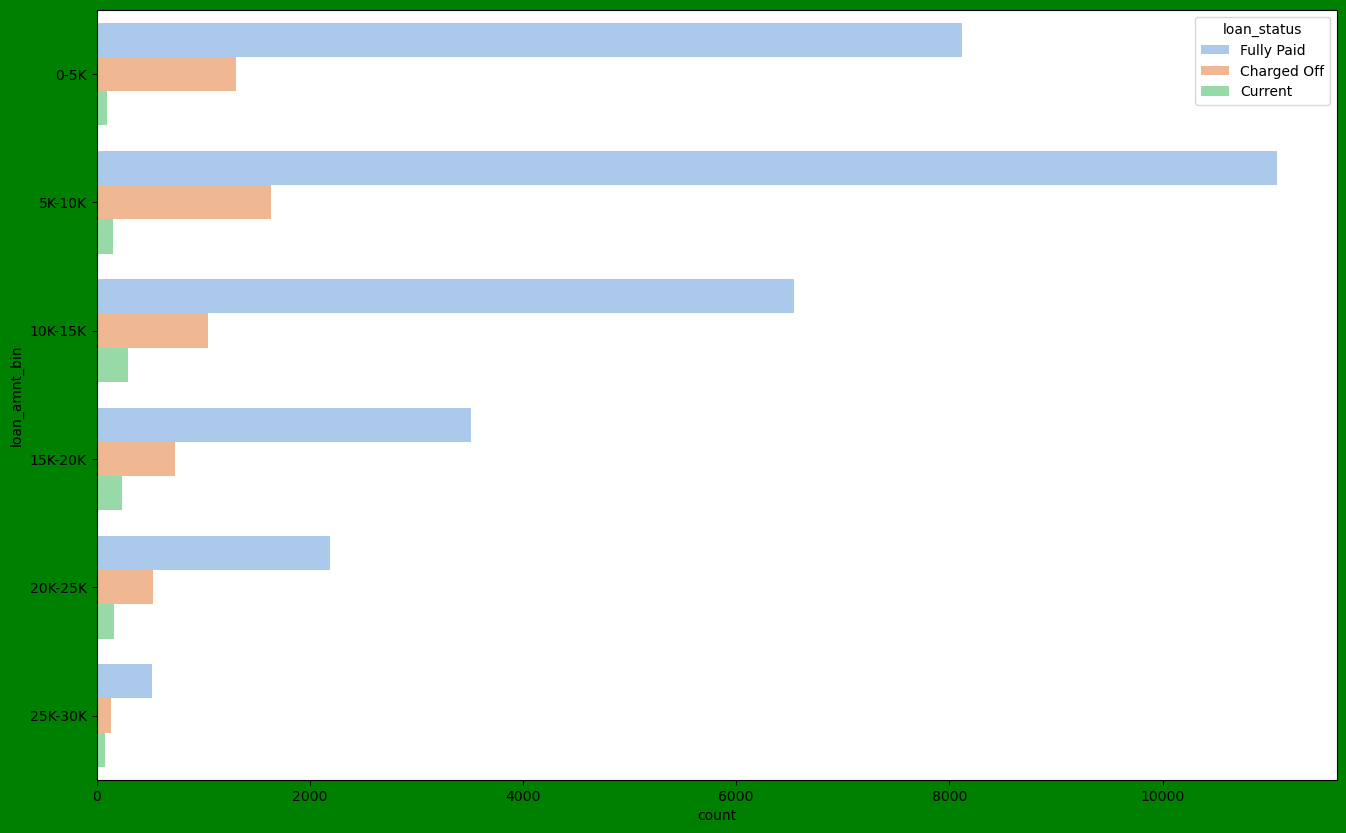

In [69]:
#Analysis on loan_amnt.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="loan_amnt_bin",data=loan,hue='loan_status',palette='pastel')
plt.show()

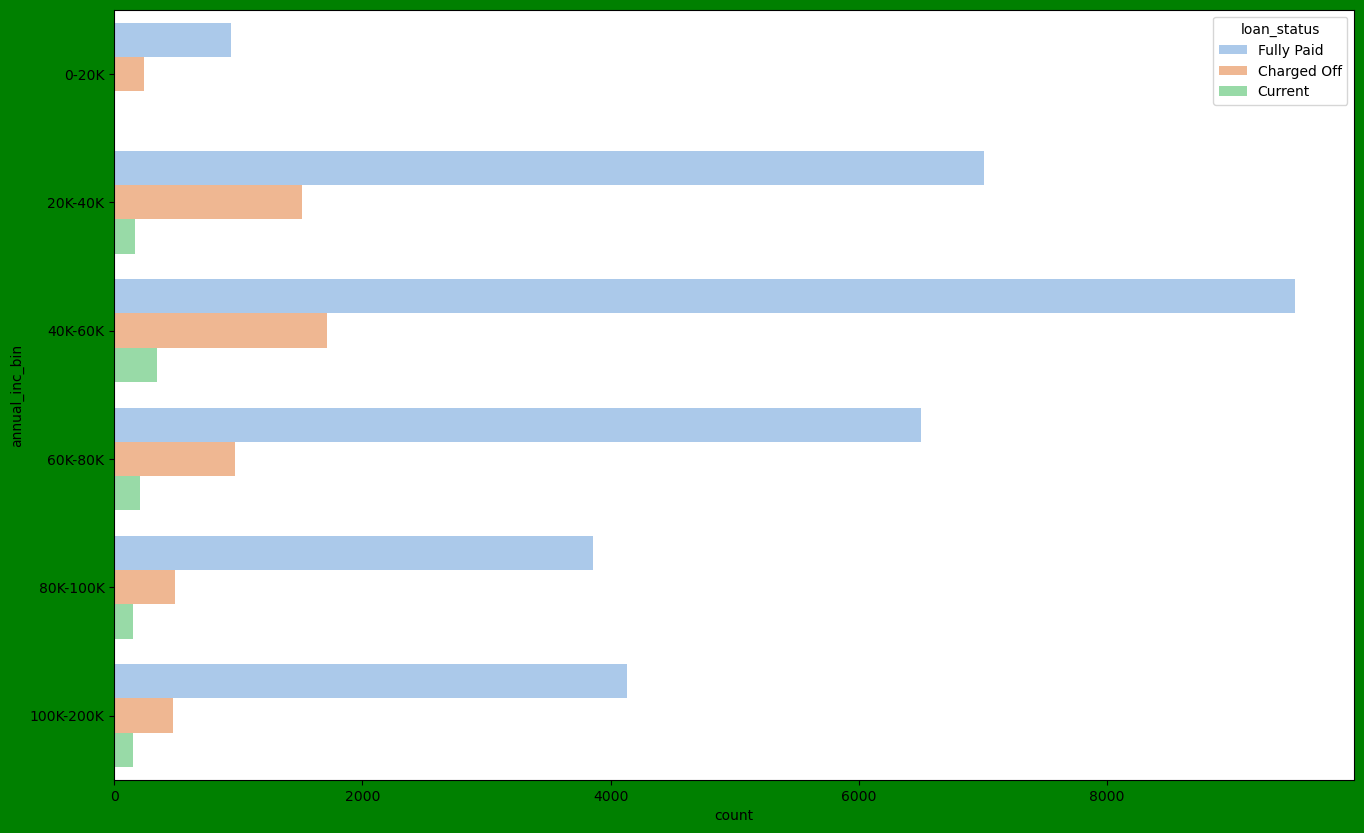

In [70]:
#Analysis on ann_income.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="annual_inc_bin",data=loan,hue='loan_status',palette='pastel')
plt.show()

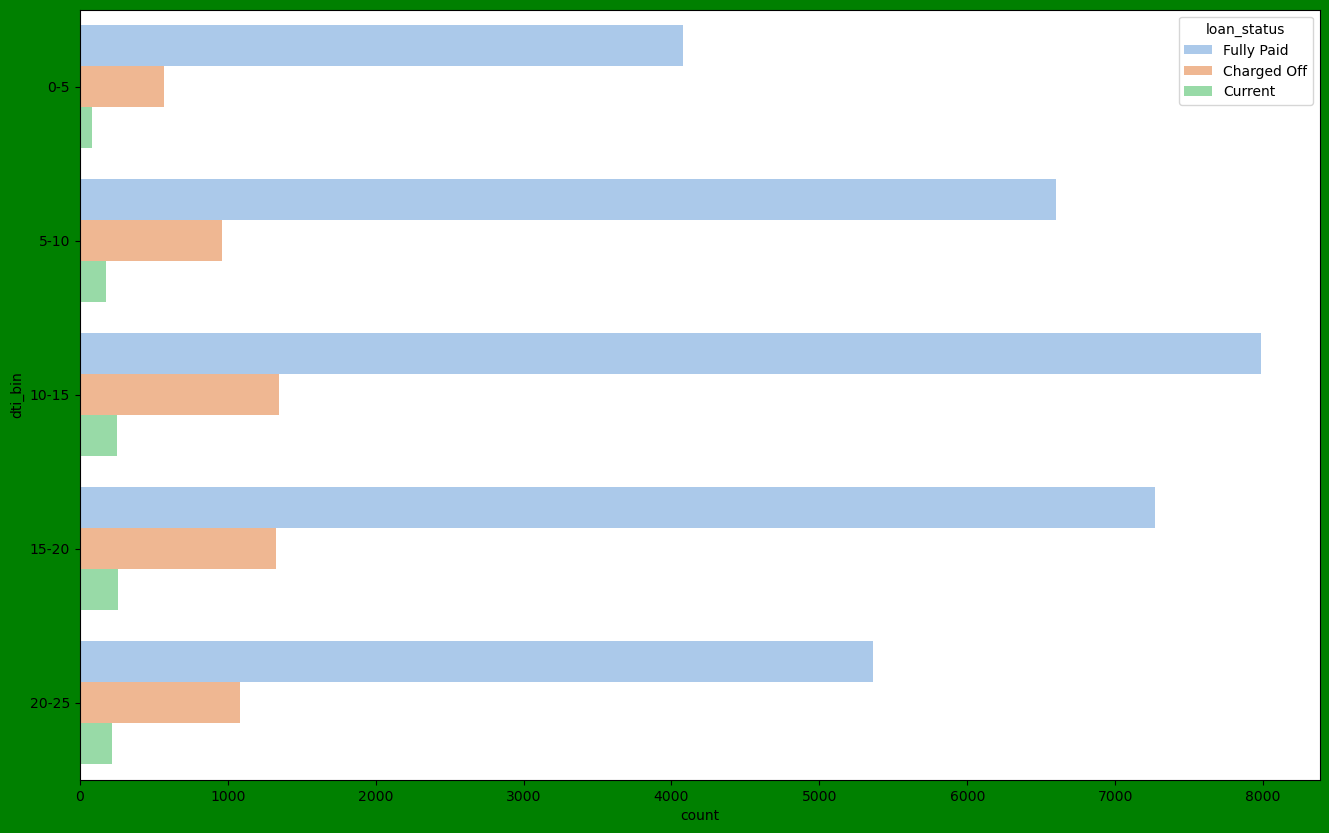

In [71]:
#Analysis on ann_income.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="dti_bin",data=loan,hue='loan_status',palette='pastel')
plt.show()

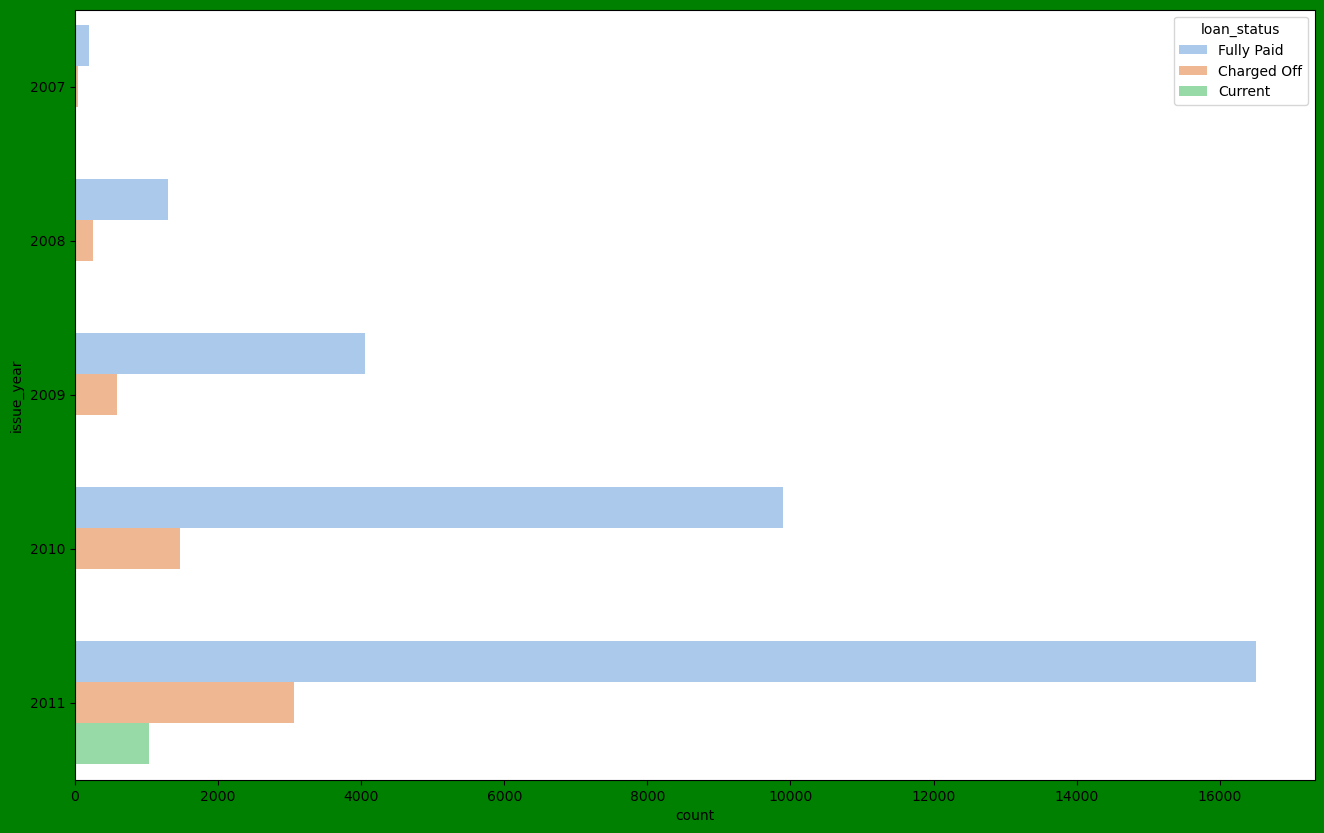

In [101]:
#Analysis on year vs defaulters
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="issue_year",data=loan,hue='loan_status',palette='pastel')
plt.show()

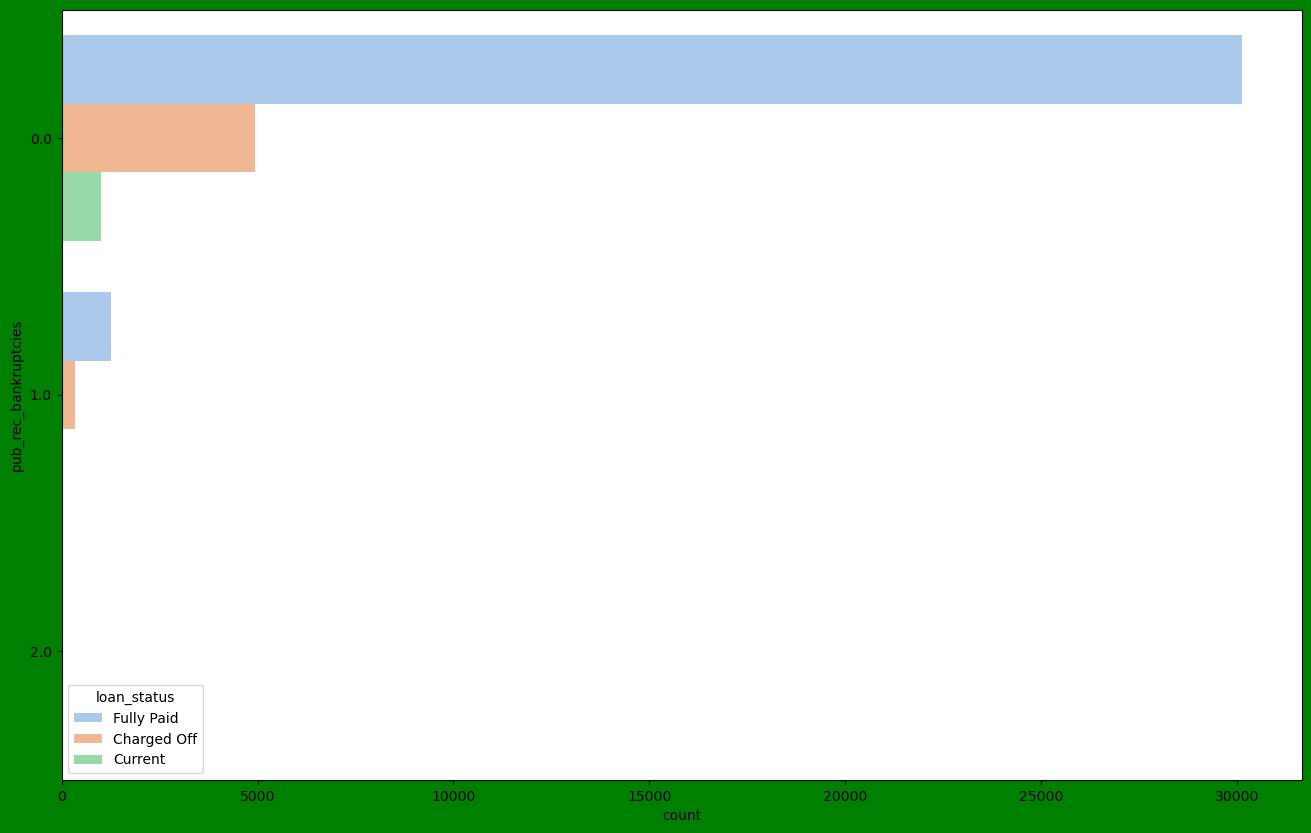

In [72]:
#Analysis on ann_income.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="pub_rec_bankruptcies",data=loan,hue='loan_status',palette='pastel')
plt.show()

#Didn't observe any different trend in above graphs.

Observations:
1.Term is making difference. So have to be concerned it term is 60 moths.
2.An increase trend is observed in Dec-Jan months and year wise.
3.We can also observe that 'CA','FL','NJ','GA','MD'. have >0.15 charge off proportions.
4.Most of the time trend of all the loantakers and delfaulters is similar.

# Bivariate Analysis

<AxesSubplot:>

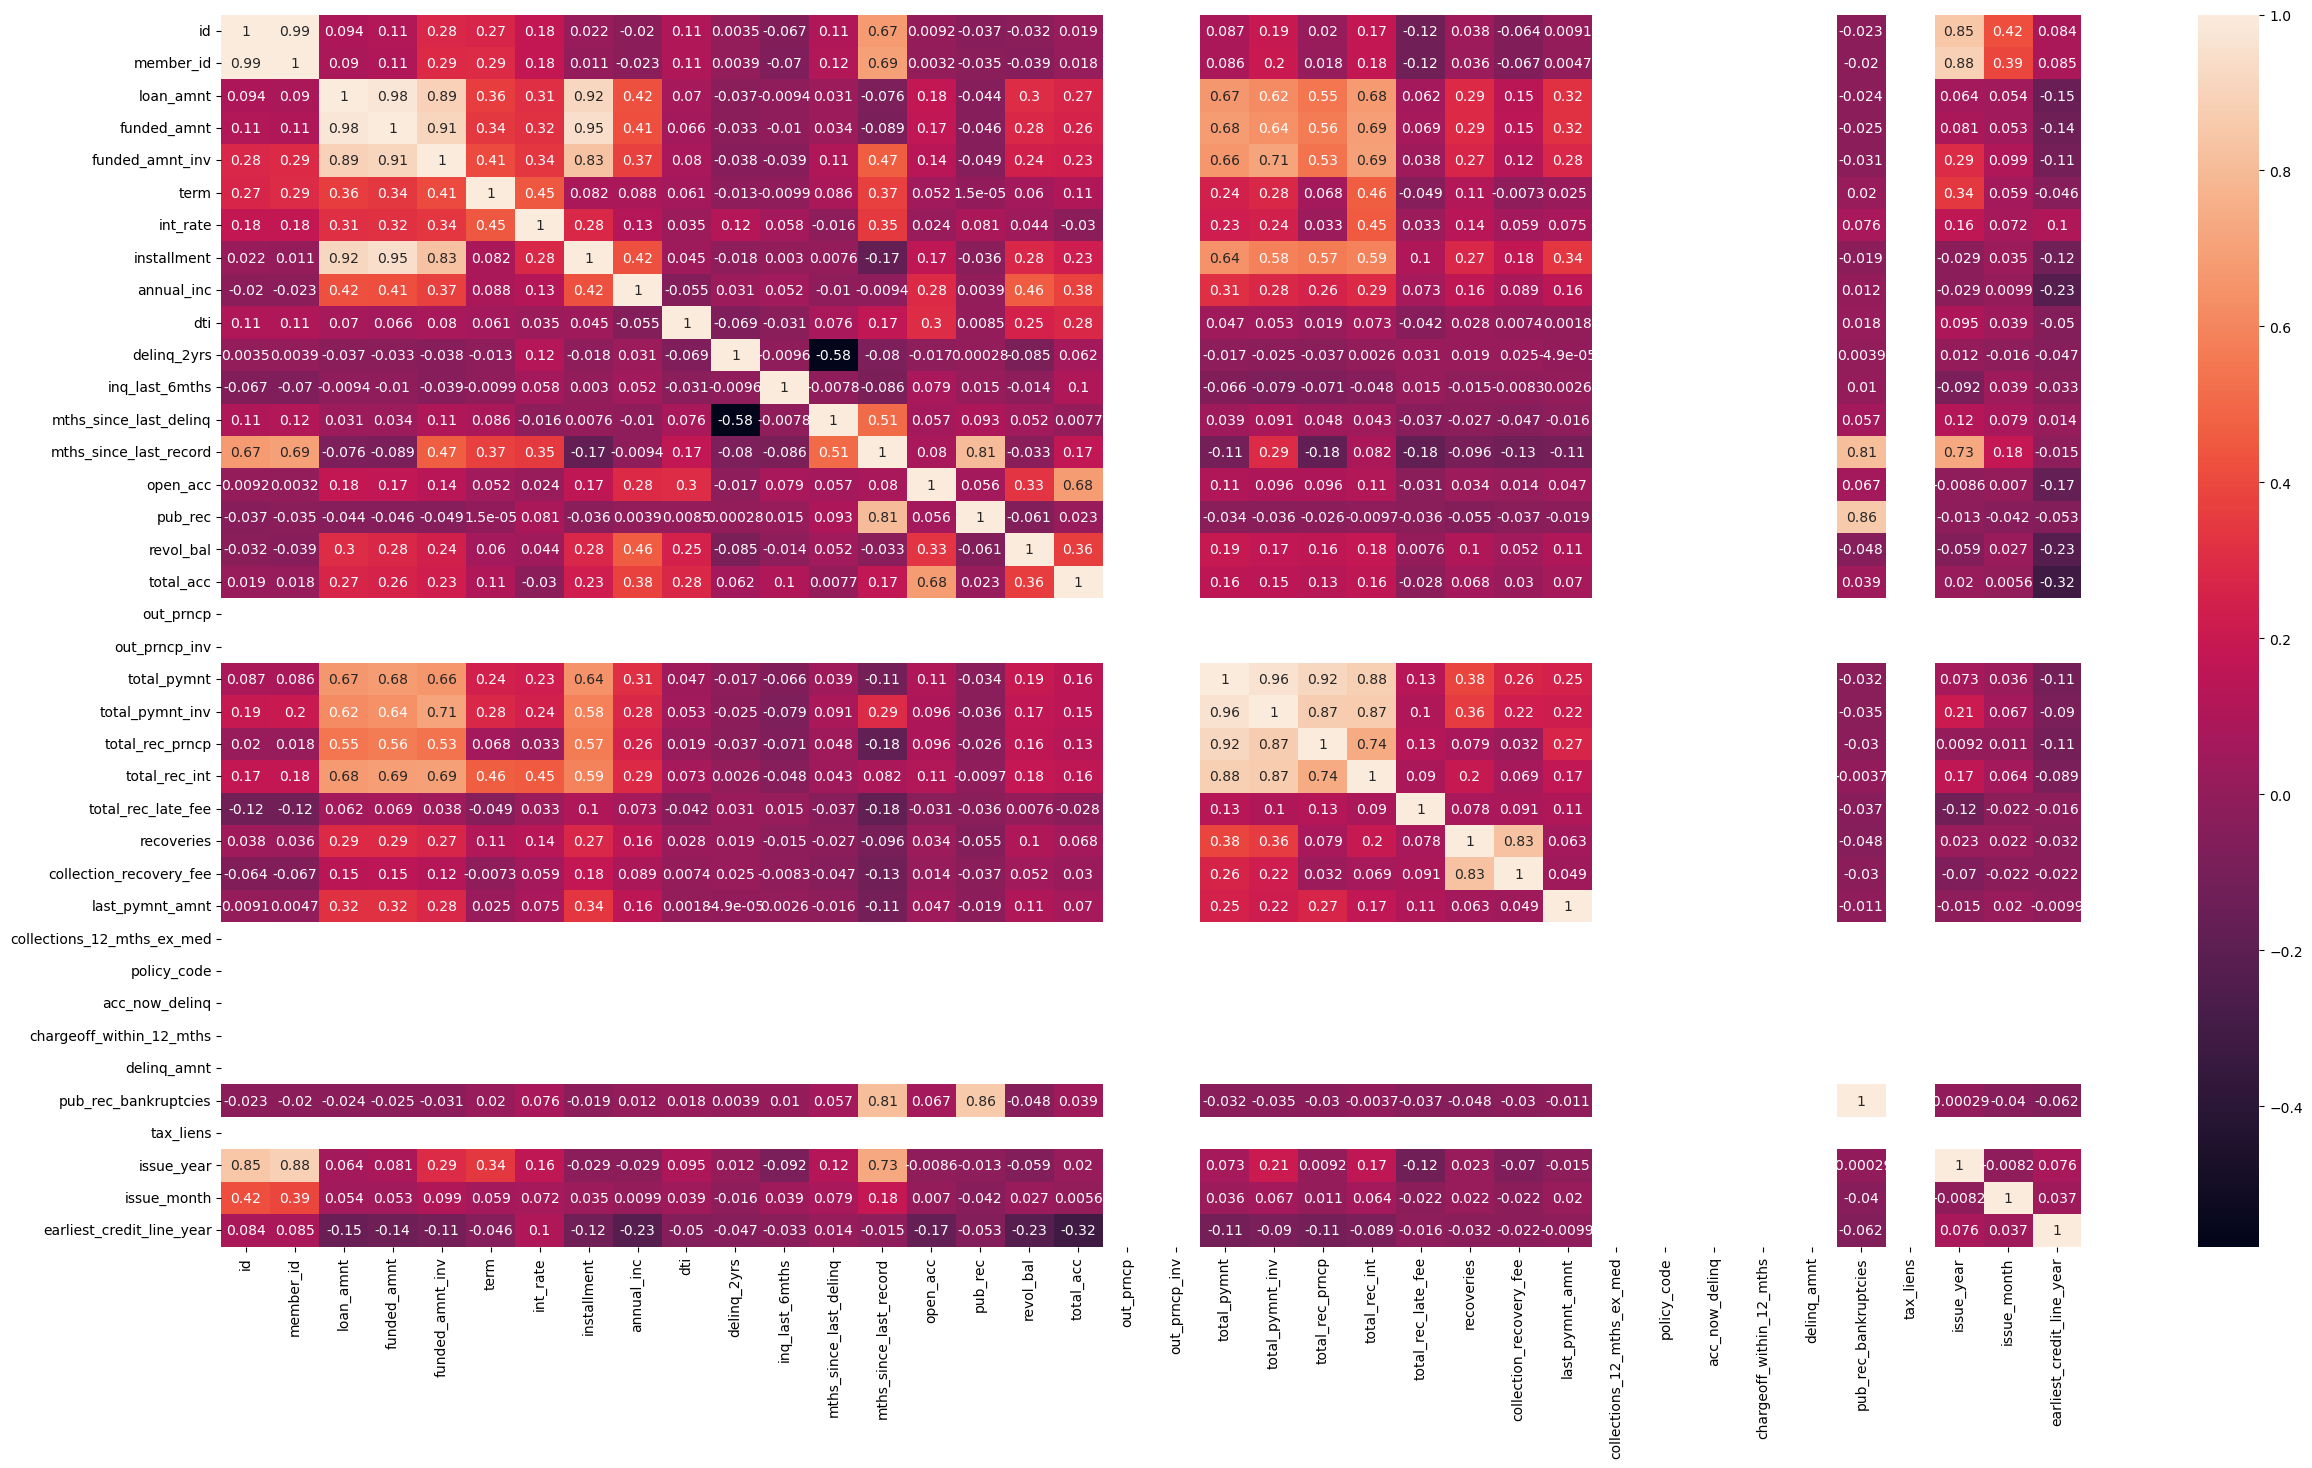

In [73]:
#Plotting correltaion for chrged off customers.

plt.subplots(figsize=(30,16))
sns.heatmap(loan1.corr(),annot=True)

<AxesSubplot:>

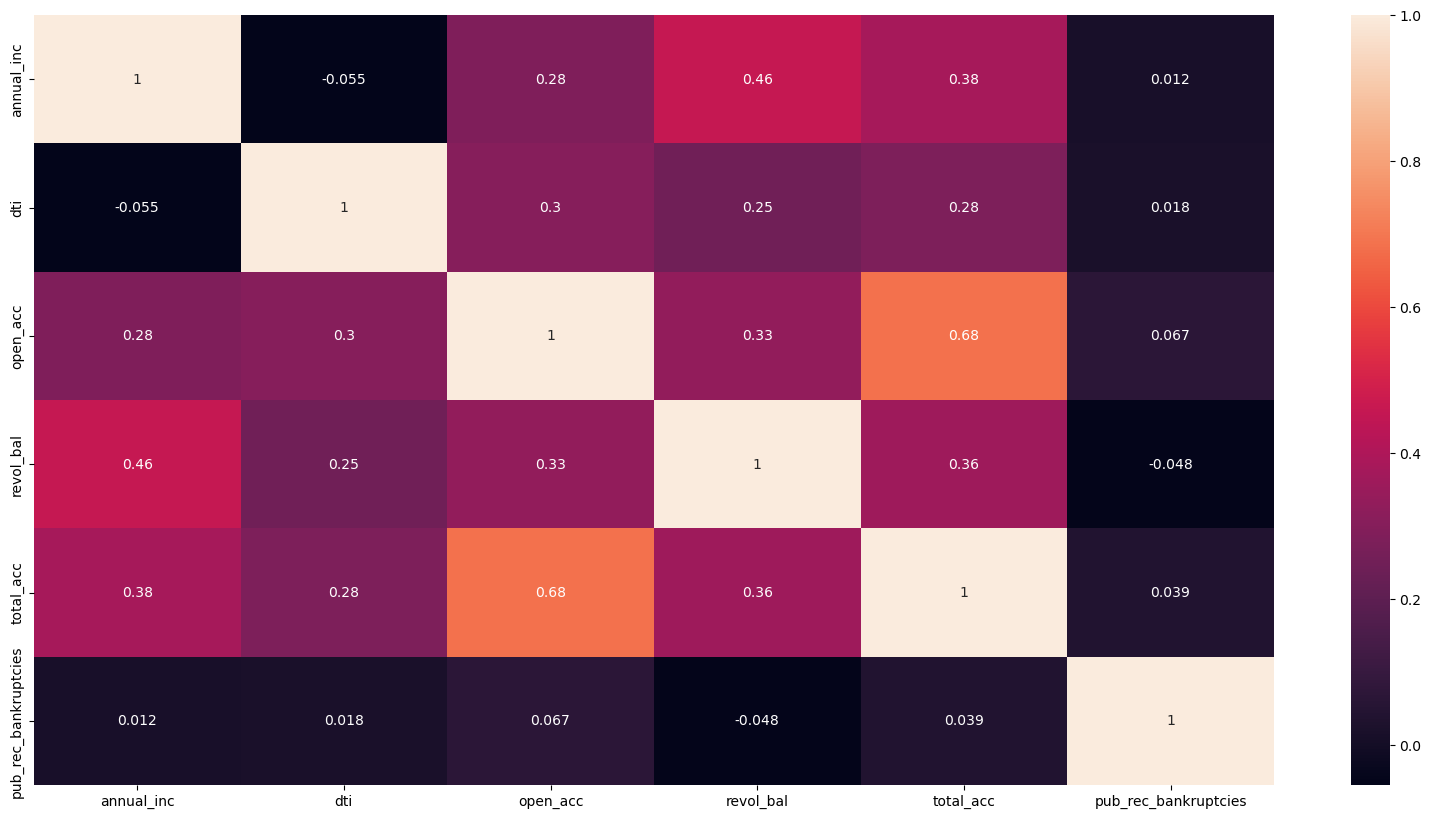

In [74]:
plt.subplots(figsize=(20,10))
sns.heatmap(loan1[borrower_attr].corr(),annot=True)

<AxesSubplot:>

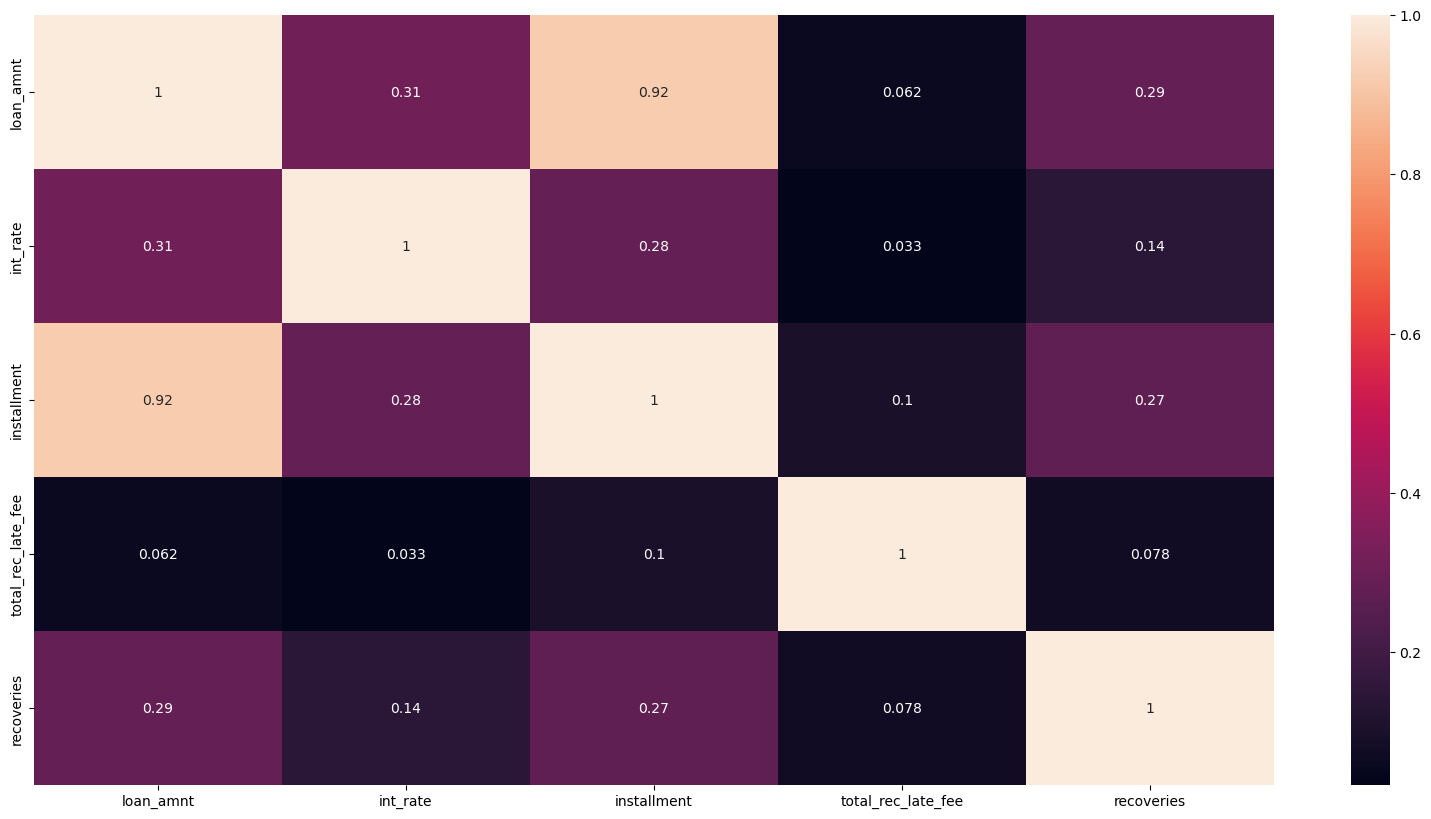

In [75]:
plt.subplots(figsize=(20,10))
sns.heatmap(loan1[loan_attr].corr(),annot=True)

<AxesSubplot:>

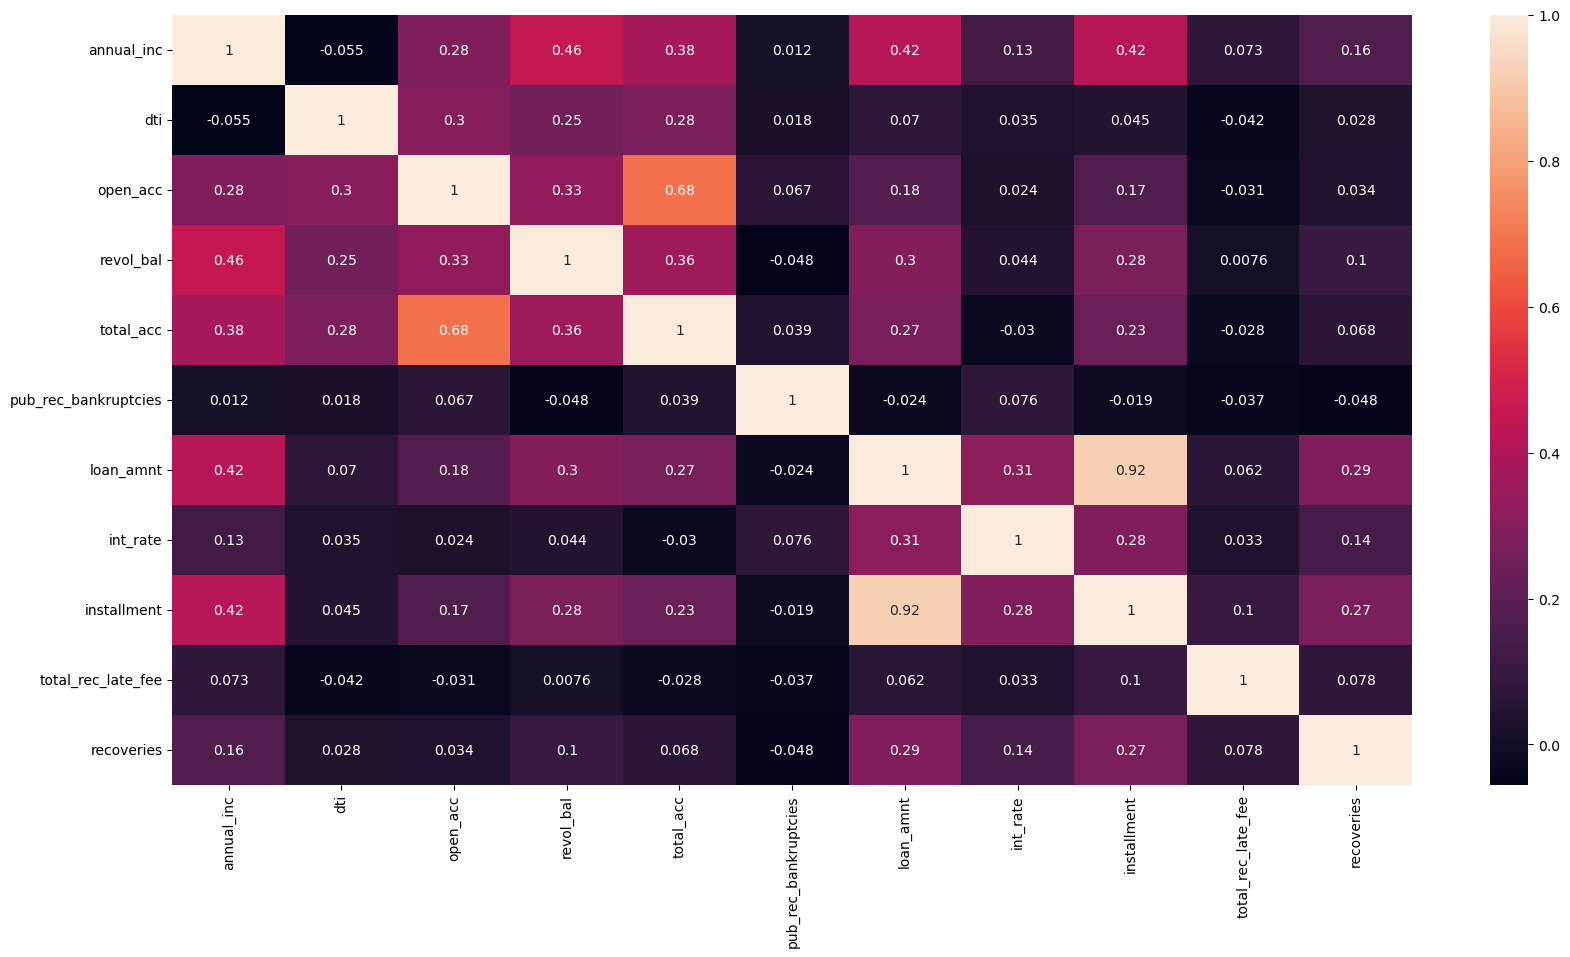

In [76]:
plt.subplots(figsize=(20,10))
sns.heatmap(loan1[borrower_attr+loan_attr].corr(),annot=True)

#Other than the obvious ones like installment proprtional to total amount, there is no proper correlation between other classes. 

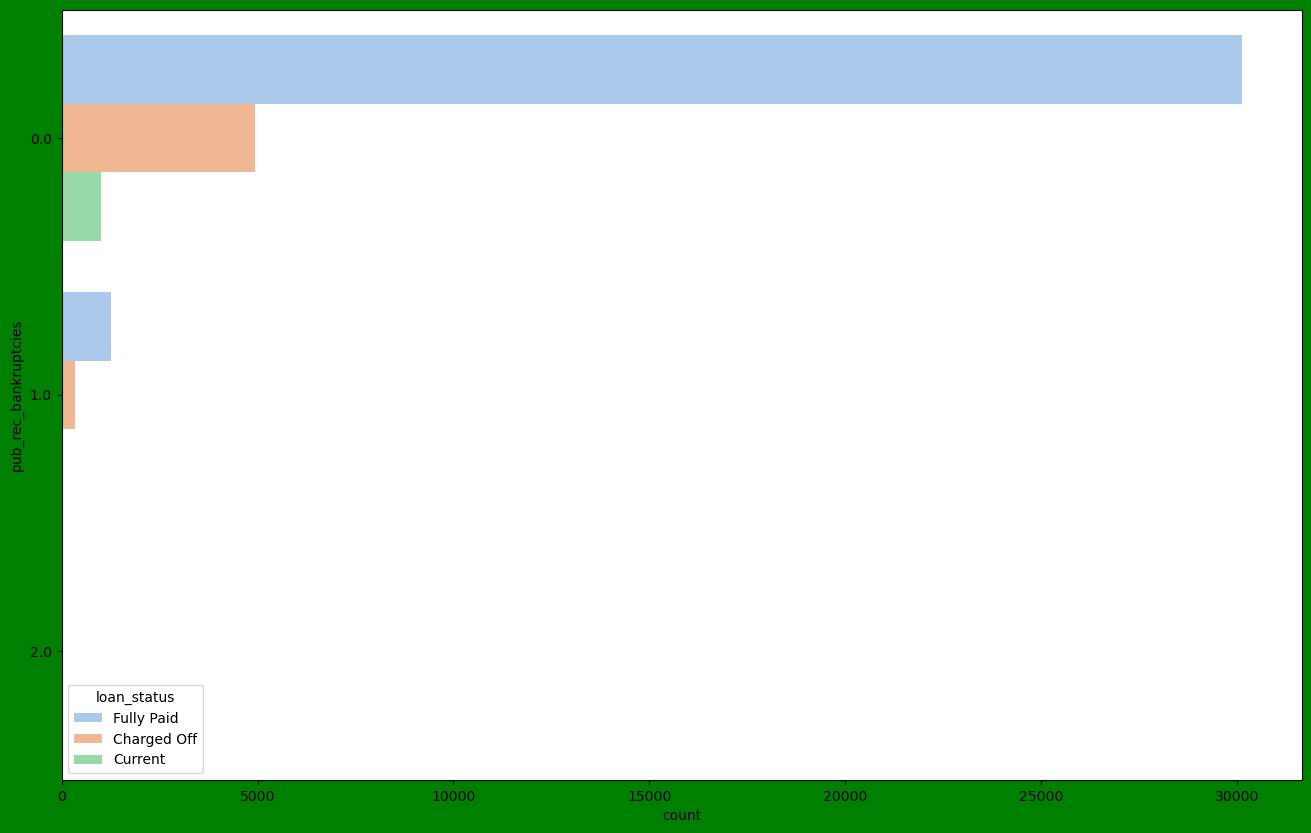

In [80]:
#Analysis on home_ownership.
plt.figure(figsize=(16,10),facecolor='g')
ax= sns.countplot(y="pub_rec_bankruptcies",data=loan,hue='loan_status',palette='pastel')
plt.show()

#proportion of charged off is larger in case of pub_rec_bankruptcies>1

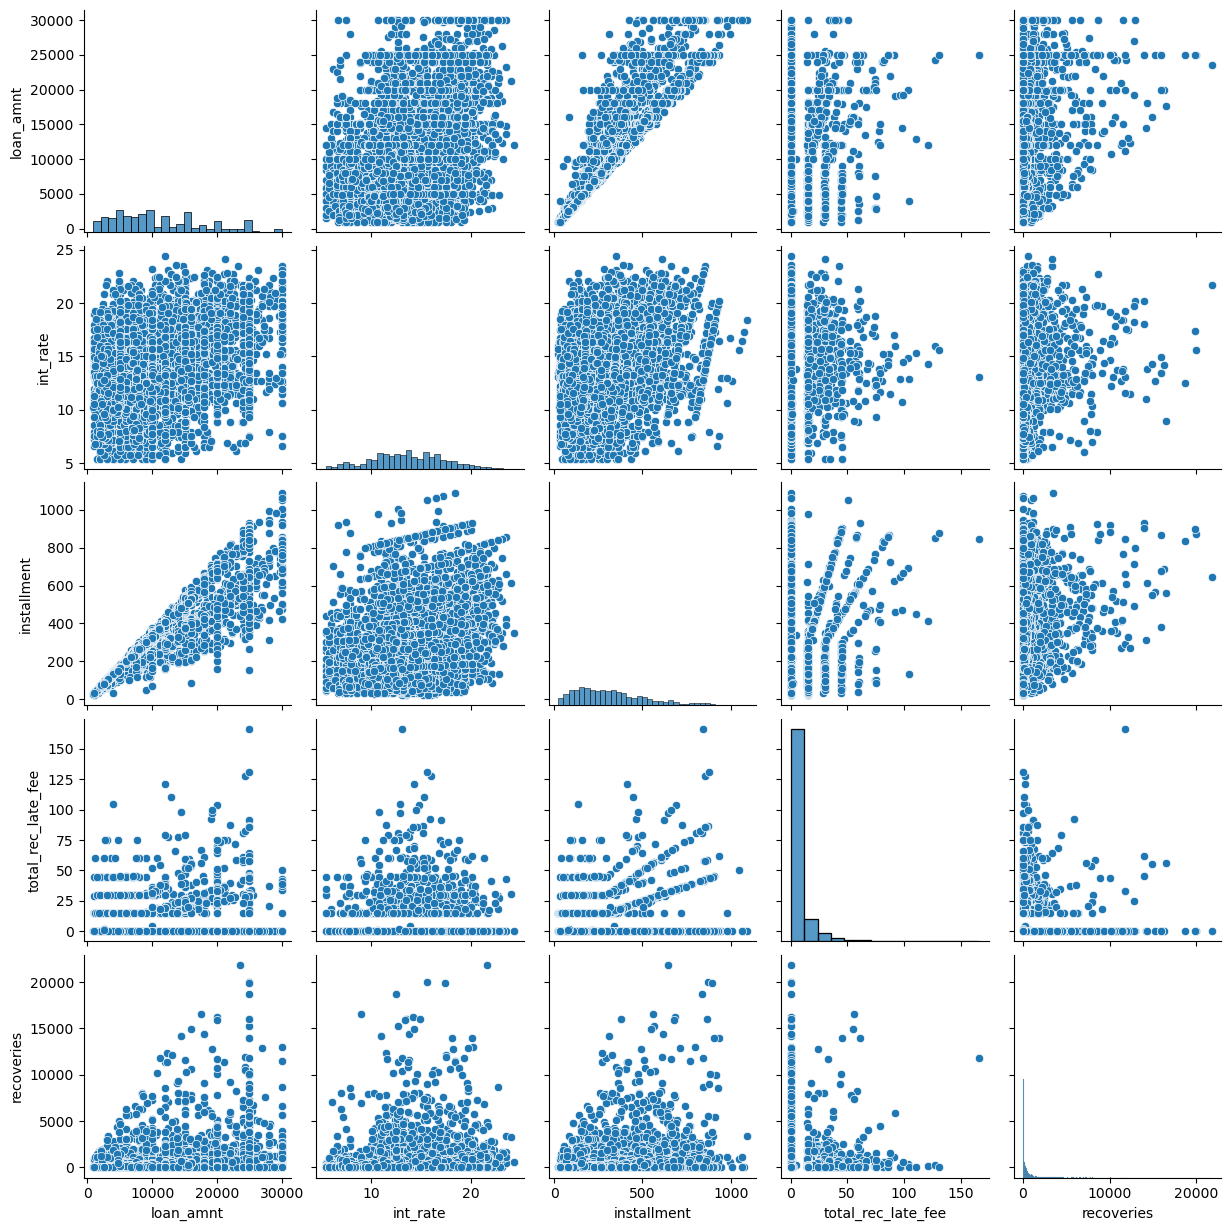

In [81]:
sns.pairplot(loan1[loan_attr])

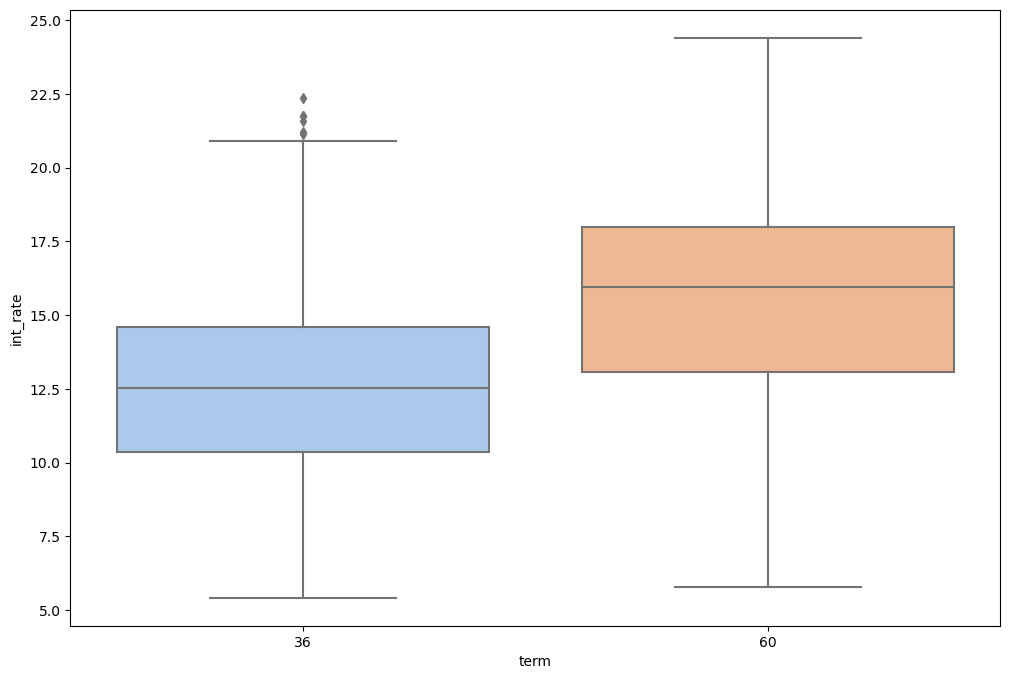

In [113]:
#Checking intrest rate variation wrt term
plt.figure(figsize=(12,8))
ax = sns.boxplot (y='int_rate', x='term', data =loan1, palette='pastel')

#We can see that there is an intrest rate increase with increase in the term.

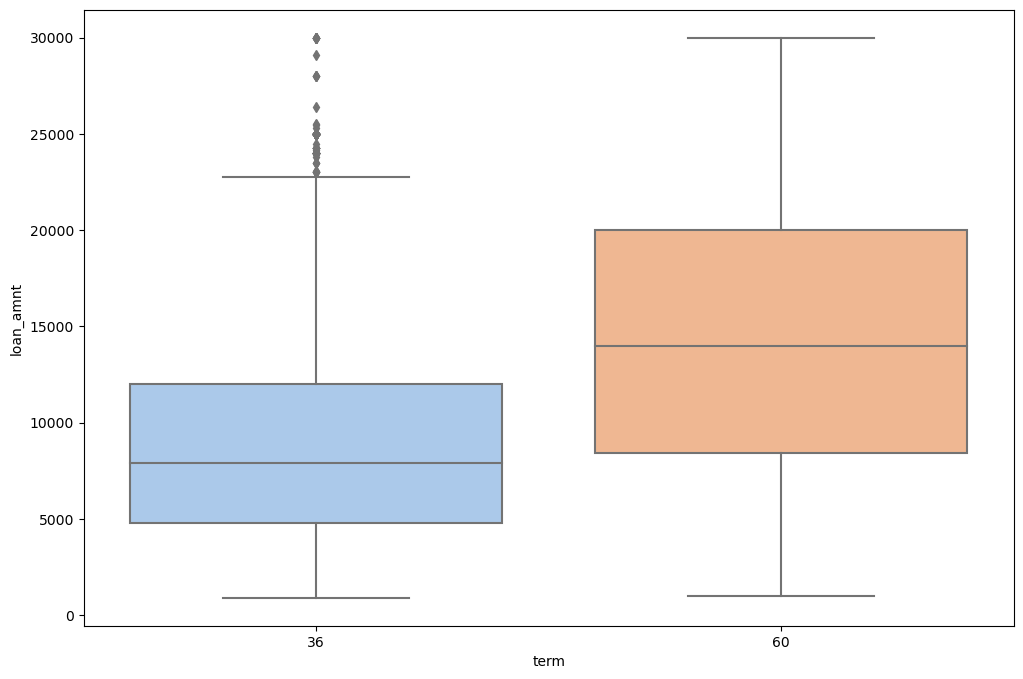

In [114]:
#Checking loan amount variation wrt term
plt.figure(figsize=(12,8))
ax = sns.boxplot (y='loan_amnt', x='term', data =loan1, palette='pastel')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0-20K'),
  Text(1, 0, '20K-40K'),
  Text(2, 0, '40K-60K'),
  Text(3, 0, '60K-80K'),
  Text(4, 0, '80K-100K'),
  Text(5, 0, '100K-200K')])

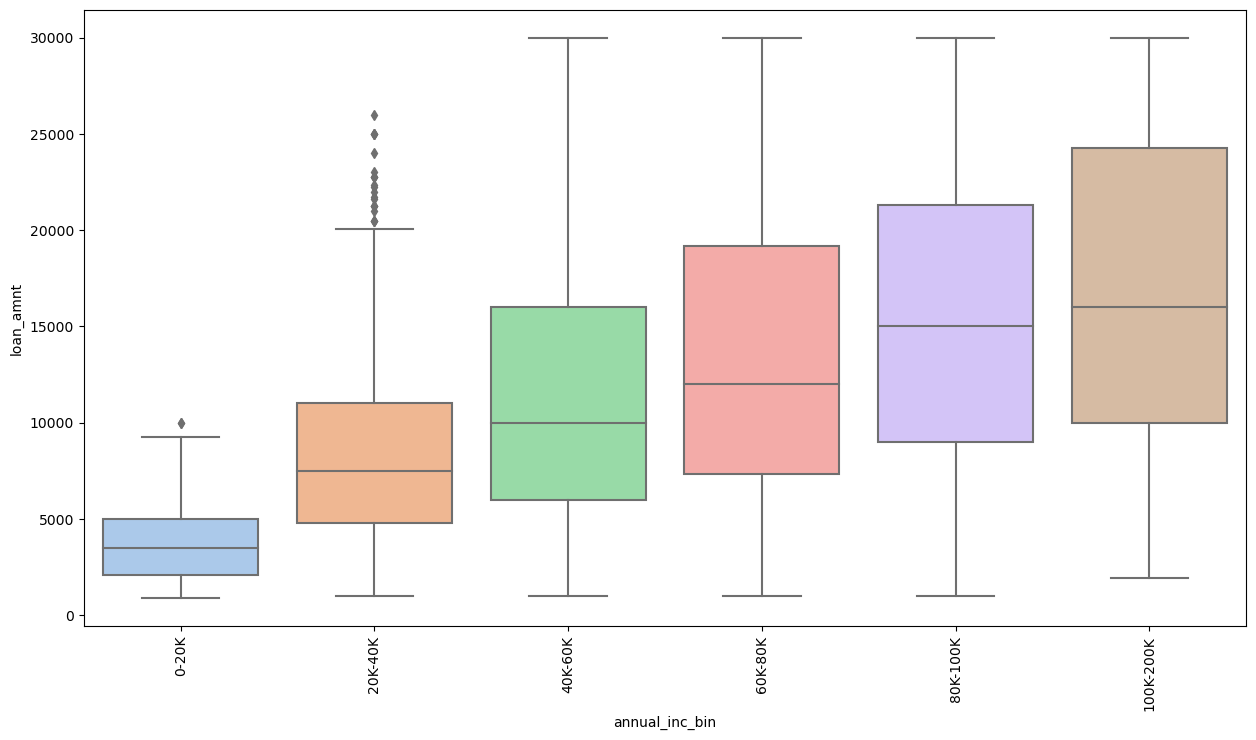

In [115]:
#Checking loan amount variation wrt term
plt.figure(figsize=(15,8))
ax = sns.boxplot (y='loan_amnt', x='annual_inc_bin', data =loan1, palette='pastel')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'small_business'),
  Text(2, 0, 'other'),
  Text(3, 0, 'debt_consolidation'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'credit_card'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'moving'),
  Text(8, 0, 'vacation'),
  Text(9, 0, 'house'),
  Text(10, 0, 'medical'),
  Text(11, 0, 'wedding'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

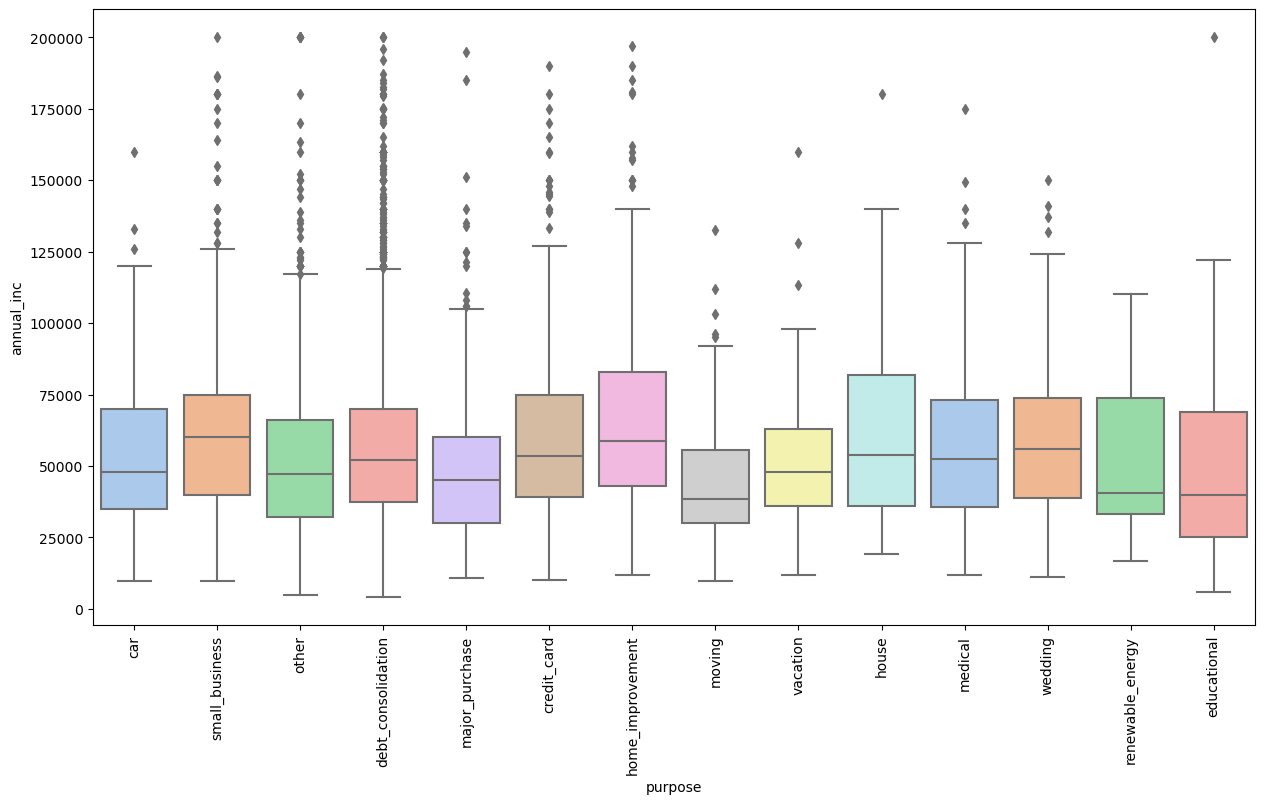

In [116]:
#Checking loan amount variation wrt term
plt.figure(figsize=(15,8))
ax = sns.boxplot (y='annual_inc', x='purpose', data =loan1, palette='pastel')
plt.xticks(rotation=90)

#Intrest rate increasing wrt term.
#If laon_amnt increases, int_rate increases,
#High annual_income earners tends to borrow loans with high principal.
#most of the high income outlier are present insmall business,other and debtC-nsolidation purpose.

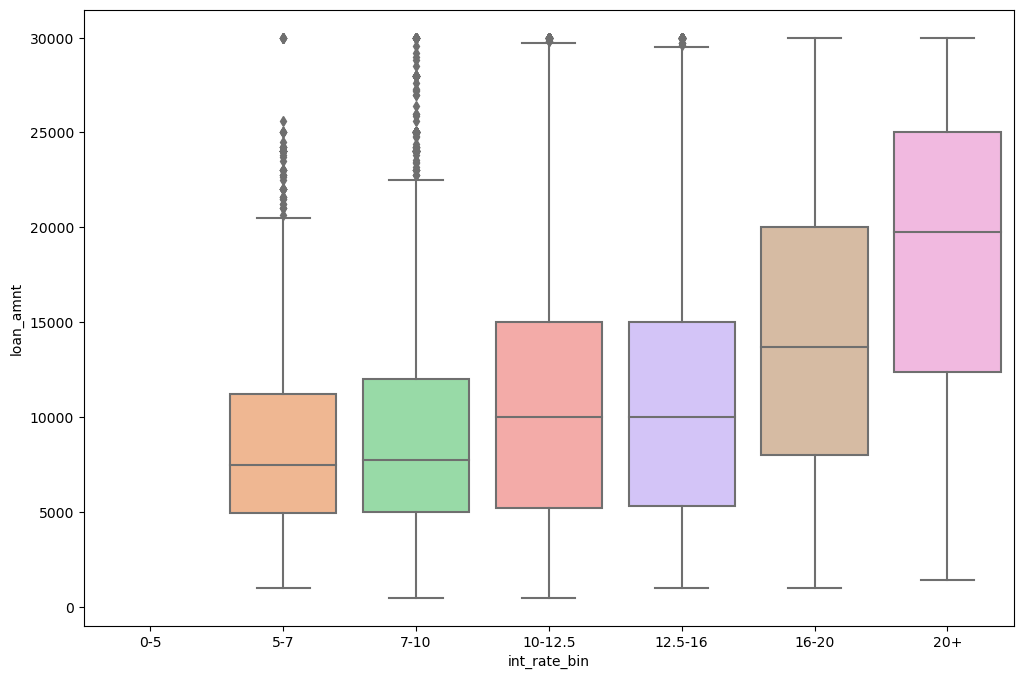

In [91]:
#Checking loan amount variation wrt int rate
plt.figure(figsize=(12,8))
ax = sns.boxplot (y='loan_amnt', x='int_rate_bin', data =loan, palette='pastel')

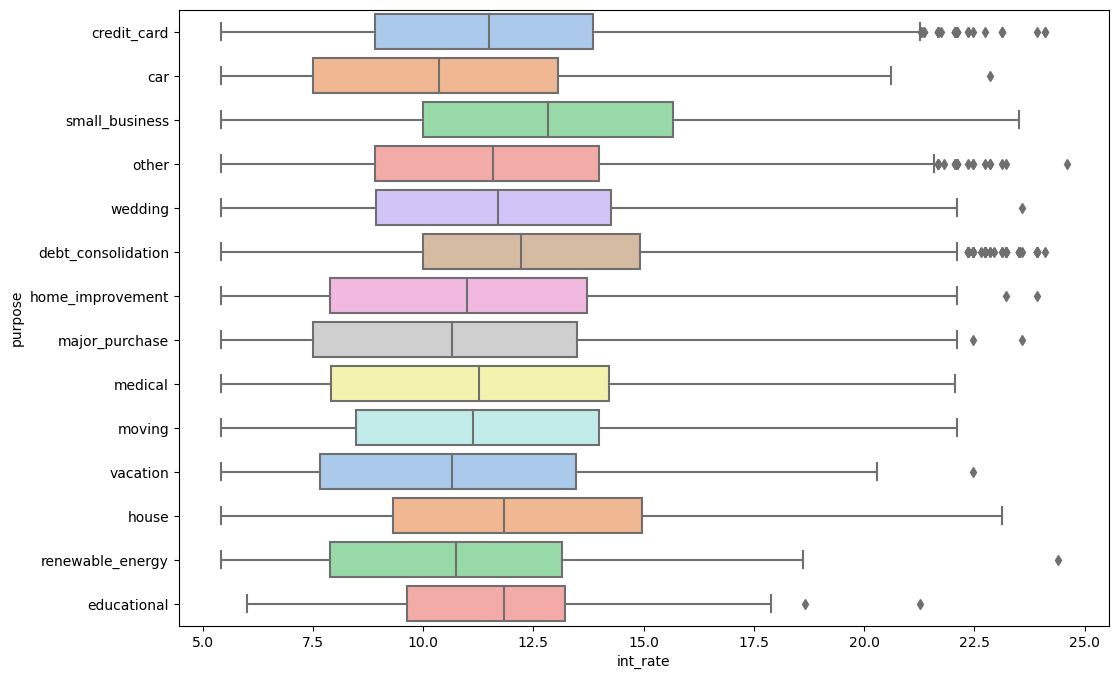

In [94]:
#Checking purpose wrt in_rate
plt.figure(figsize=(12,8))
ax = sns.boxplot (x='int_rate', y='purpose', data =loan, palette='pastel')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

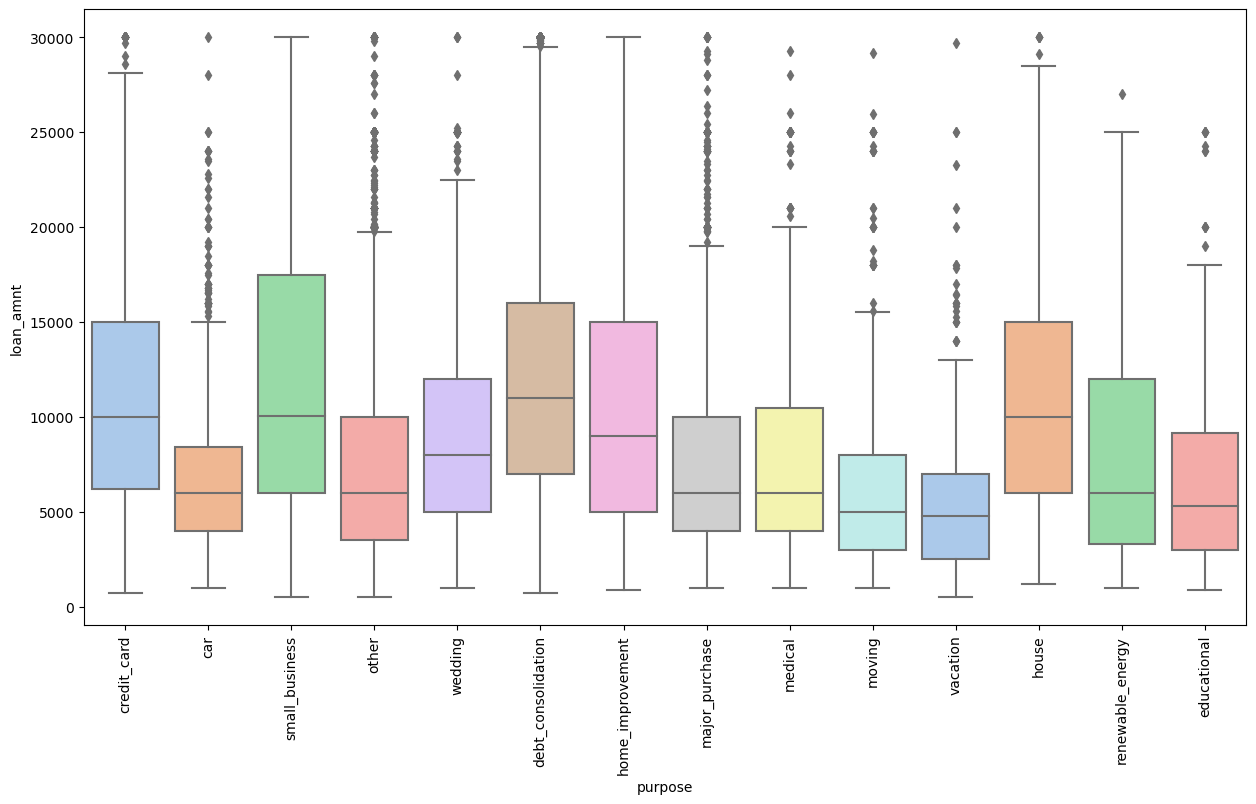

In [97]:
#Checking loan amount variation wrt term
plt.figure(figsize=(15,8))
ax = sns.boxplot (y='loan_amnt', x='purpose', data =loan, palette='pastel')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

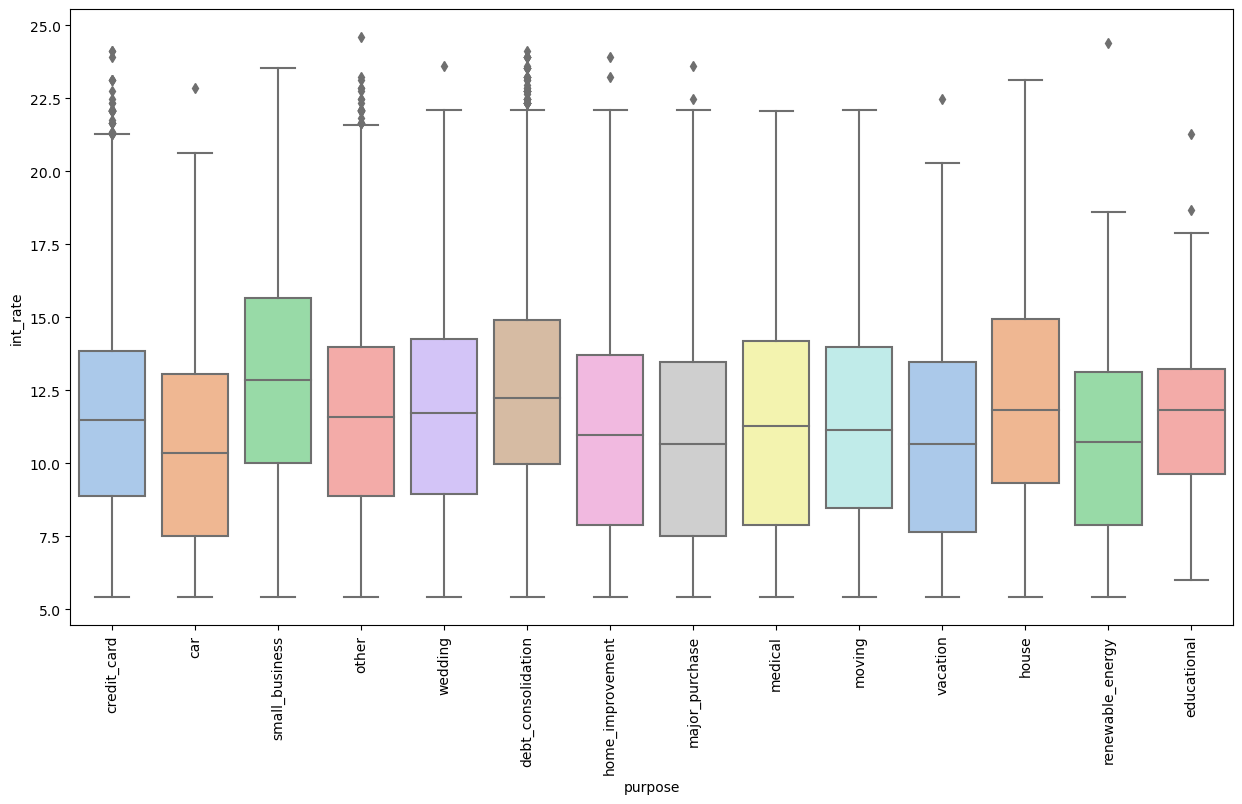

In [98]:
#Checking loan amount variation wrt term
plt.figure(figsize=(15,8))
ax = sns.boxplot (y='int_rate', x='purpose', data =loan, palette='pastel')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

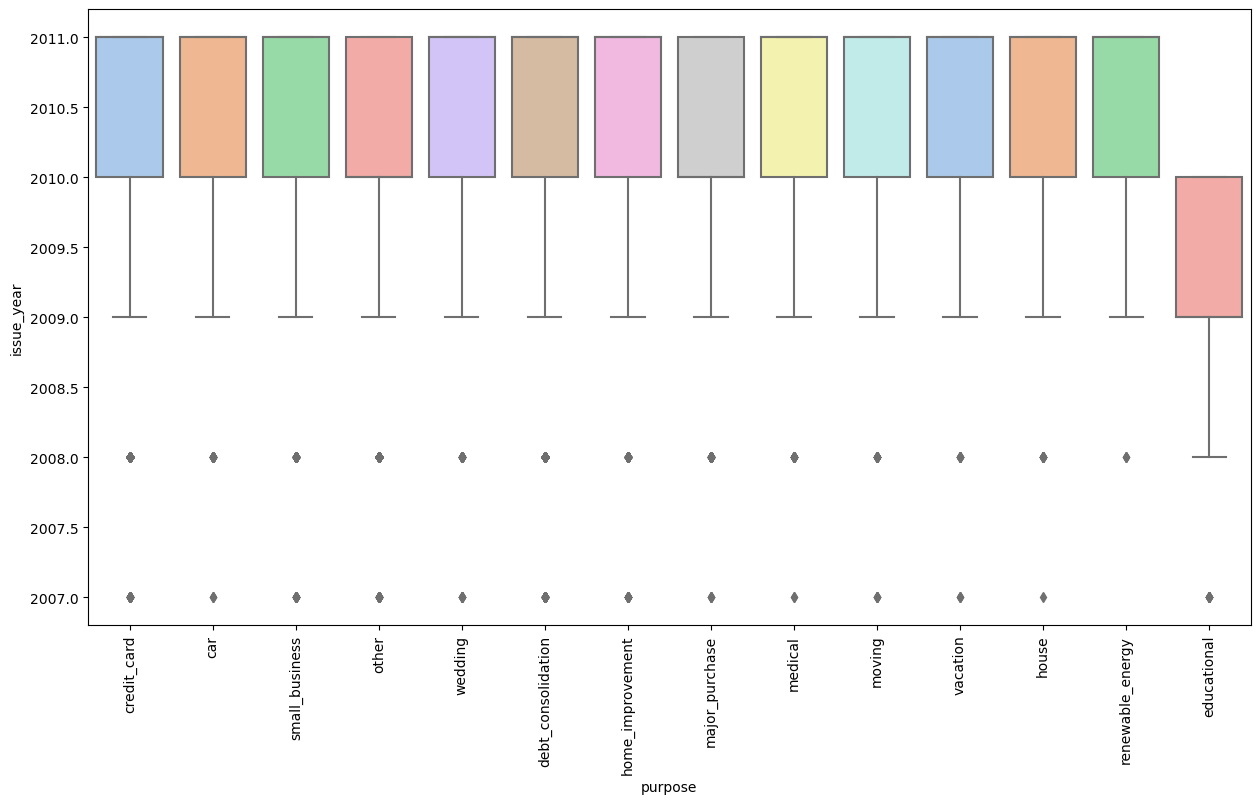

In [103]:
#Checking loan amount variation wrt term
plt.figure(figsize=(15,8))
ax = sns.boxplot (y='issue_year', x='purpose', data =loan, palette='pastel')
plt.xticks(rotation=90)

In [ ]:
#Checking int rate variation wrt grade on charged off customers
plt.figure(figsize=(15,8))
ax = sns.boxplot (y='grade', x='int_rate_bin', data =loan1, palette='pastel')
plt.xticks(rotation=90)

In [ ]:
#Checking loan amount variation wrt grade on charged off customers
plt.figure(figsize=(15,8))
ax = sns.boxplot (y='grade', x='loan_amnt_bin', data =loan1, palette='pastel')
plt.xticks(rotation=90)